In [ ]:
!pip install ultralytics --upgrade -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.9 MB/s eta 0:00:00


In [ ]:
from IPython.display import Image, display

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 308MB/s]


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
Tesla T4


In [ ]:
model.train(
    data='traffic-detection-project-data/data.yaml',  # <-- your custom yaml here
    epochs=100,                      # number of training epochs (can increase if needed)
    imgsz=640,                      # image size for training
    batch=32,                       # batch size (adjust if Kaggle RAM allows)
    name='yolov8s_custom_finetune2',   # name of the training run
    mosaic=0.5,
    mixup=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    translate=0.1,
    scale=0.3,                      # To zoom in and zoom out 0.7x and 1.3x
    fliplr=0.5,
    flipud=0.0,
    degrees=0.0,
    patience=50,
    amp = True                     # To train the model faster, lower precision

)


Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/traffic-detection-project/data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_custom_finetune2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /kaggle/input/traffic-detection-project/train/labels... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:09<00:00, 635.78it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/traffic-detection-project/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 274.1±139.1 MB/s, size: 85.6 KB)


val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<00:00, 571.01it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8s_custom_finetune2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_custom_finetune2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.81G      1.161     0.7615      1.029        176        640: 100%|██████████| 182/182 [02:05<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        549       6270      0.837      0.734      0.823      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.35G      1.164     0.7715      1.031        131        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        549       6270      0.749      0.772      0.804      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.43G      1.163     0.7693      1.027        204        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        549       6270      0.806      0.732      0.807      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.62G      1.159     0.7635       1.03        182        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]

                   all        549       6270      0.834      0.749      0.832       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.69G      1.136     0.7342      1.019        176        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all        549       6270      0.819      0.766      0.844      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.82G      1.115     0.7126      1.007        199        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]

                   all        549       6270      0.843      0.778      0.849      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.67G       1.09     0.6858     0.9998        209        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]

                   all        549       6270      0.846      0.827      0.882       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.87G      1.075     0.6695     0.9933        134        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]

                   all        549       6270      0.852      0.828      0.884      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.81G      1.055      0.658     0.9843        254        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270      0.853       0.83      0.885      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.42G      1.036     0.6379     0.9777        214        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]

                   all        549       6270      0.886       0.81      0.901      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.41G      1.026     0.6313     0.9749        171        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]

                   all        549       6270      0.856       0.83      0.897      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.05G      1.005     0.6107     0.9665        210        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.44it/s]

                   all        549       6270      0.891      0.848       0.91      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.99G      1.003     0.6119     0.9656        206        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.43it/s]

                   all        549       6270      0.885      0.861      0.915      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.75G     0.9832      0.592     0.9577        223        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        549       6270      0.872      0.856      0.904      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.72G     0.9763      0.588     0.9554        183        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.42it/s]

                   all        549       6270      0.905      0.852       0.92      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.09G     0.9611     0.5822     0.9538        231        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]

                   all        549       6270      0.905      0.857      0.919      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.92G     0.9528     0.5728     0.9486        167        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]

                   all        549       6270      0.909      0.866      0.922      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.33G     0.9396     0.5598     0.9446        232        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]

                   all        549       6270      0.886      0.883      0.923      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.64G     0.9253     0.5507     0.9399        151        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        549       6270      0.881      0.879      0.923      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.49G     0.9173     0.5459     0.9373        158        640: 100%|██████████| 182/182 [02:00<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]

                   all        549       6270      0.909      0.867      0.928      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.74G      0.902     0.5346     0.9328        232        640: 100%|██████████| 182/182 [01:58<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]

                   all        549       6270      0.905       0.87      0.931      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       7.4G     0.8991     0.5313      0.931        212        640: 100%|██████████| 182/182 [01:58<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]

                   all        549       6270      0.901      0.884      0.933      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.92G     0.8885     0.5253     0.9281        215        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]

                   all        549       6270      0.916      0.865      0.933      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.74G     0.8845      0.523      0.926        192        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]

                   all        549       6270      0.915      0.877      0.931      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.76G     0.8825     0.5201     0.9248        170        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        549       6270      0.916      0.881      0.934       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.35G     0.8752     0.5164     0.9233        184        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]

                   all        549       6270      0.914      0.881      0.935      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.76G     0.8616      0.506     0.9213        189        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        549       6270      0.904      0.876      0.932      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.81G     0.8515     0.4992     0.9181        203        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]

                   all        549       6270      0.905      0.898      0.937      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.47G     0.8513     0.4985     0.9165        171        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

                   all        549       6270      0.912      0.894      0.939       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.86G     0.8375     0.4895     0.9112        249        640: 100%|██████████| 182/182 [02:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]

                   all        549       6270      0.907      0.895      0.934      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.67G     0.8393     0.4928      0.913        160        640: 100%|██████████| 182/182 [02:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]

                   all        549       6270      0.913      0.893      0.938      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.69G      0.827     0.4859      0.909        271        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270      0.925      0.891      0.942      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.75G     0.8185     0.4779     0.9071        156        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]

                   all        549       6270      0.909        0.9      0.938      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.85G     0.8187     0.4784     0.9066        128        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        549       6270      0.924      0.899      0.945      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       7.7G     0.8037     0.4686     0.9031        232        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        549       6270      0.932      0.885      0.943      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       8.1G     0.8038     0.4701     0.9034        145        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]

                   all        549       6270      0.922      0.891      0.942      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.73G     0.7944     0.4598     0.8992        161        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.56it/s]

                   all        549       6270      0.941      0.887      0.944      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.45G     0.7928       0.46     0.9003        198        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        549       6270      0.929      0.899      0.942      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.02G     0.7916     0.4601     0.8998        207        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270      0.928      0.893      0.944      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.82G      0.784     0.4556     0.8979        225        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270       0.92      0.912      0.943      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       7.7G     0.7799     0.4501     0.8967        177        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]

                   all        549       6270      0.914      0.916      0.947      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.72G     0.7754     0.4492     0.8946        181        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        549       6270      0.931      0.904      0.948      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       7.7G     0.7608     0.4413     0.8907        123        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all        549       6270      0.918      0.907      0.945      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.66G     0.7559     0.4388     0.8897        191        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]

                   all        549       6270      0.925      0.912      0.948      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.17G     0.7545      0.439     0.8896        187        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]

                   all        549       6270      0.923      0.908      0.944      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.34G     0.7482     0.4336     0.8868        193        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]

                   all        549       6270      0.932      0.903      0.951      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.64G     0.7436     0.4317     0.8876        153        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        549       6270      0.913      0.924      0.948      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.79G     0.7368     0.4276     0.8847        165        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        549       6270      0.936      0.906       0.95      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.68G      0.733     0.4269     0.8832        156        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270      0.928      0.917      0.952      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.19G     0.7333     0.4257     0.8842        284        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        549       6270      0.912       0.92      0.949       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.75G     0.7235      0.422     0.8807        166        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        549       6270       0.93      0.909       0.95      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       7.7G     0.7162     0.4157       0.88        146        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        549       6270      0.938      0.905       0.95      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.11G     0.7147     0.4147     0.8794        204        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]

                   all        549       6270      0.937      0.907      0.949      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.46G     0.7147      0.417     0.8786        134        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        549       6270      0.928      0.913      0.948      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.66G      0.706     0.4113     0.8774        169        640: 100%|██████████| 182/182 [01:58<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        549       6270      0.936      0.912      0.951      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       8.4G     0.7024     0.4096     0.8761        199        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]

                   all        549       6270      0.938       0.91      0.951      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.64G     0.7071     0.4108     0.8779        164        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]

                   all        549       6270      0.936      0.914      0.952      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.07G     0.6912     0.4016     0.8723        172        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        549       6270      0.935      0.912      0.951       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.49G     0.6824     0.3956     0.8711        130        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        549       6270      0.938      0.911      0.951      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.28G     0.6924     0.4044     0.8749        205        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        549       6270      0.941      0.907      0.951      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.02G     0.6831     0.3976      0.871        212        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        549       6270      0.945      0.903      0.951      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.79G     0.6815     0.3965     0.8715        192        640: 100%|██████████| 182/182 [02:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]

                   all        549       6270      0.931      0.918      0.952      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.73G     0.6766     0.3968     0.8683        172        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]

                   all        549       6270      0.939      0.918      0.954      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.47G     0.6706     0.3905     0.8684        155        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        549       6270      0.933      0.914       0.95      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.14G     0.6692     0.3906     0.8685        180        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]

                   all        549       6270      0.932       0.92      0.951      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.19G     0.6647     0.3877     0.8678        249        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        549       6270       0.94      0.904      0.952       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.86G     0.6512     0.3792     0.8629        168        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]

                   all        549       6270      0.938      0.912      0.952      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.96G      0.659     0.3842     0.8661        160        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270      0.941      0.912      0.951      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.35G     0.6511       0.38     0.8643        152        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.42it/s]

                   all        549       6270      0.932      0.912      0.951      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.75G     0.6476     0.3796      0.863        213        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        549       6270      0.938      0.908      0.951       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.06G     0.6487     0.3786     0.8631        219        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        549       6270      0.942      0.903      0.952      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.66G     0.6398     0.3741     0.8618        154        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]

                   all        549       6270      0.942      0.907      0.952      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.34G     0.6445     0.3769     0.8624        171        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]

                   all        549       6270      0.941      0.908       0.95      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.71G      0.631     0.3698     0.8593        254        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        549       6270      0.936      0.915       0.95      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.02G     0.6273     0.3661     0.8592        183        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]

                   all        549       6270      0.934      0.915      0.951      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.34G     0.6275     0.3678     0.8578        244        640: 100%|██████████| 182/182 [02:00<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        549       6270      0.937      0.914      0.952      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.07G     0.6257     0.3674      0.859        171        640: 100%|██████████| 182/182 [02:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        549       6270      0.931      0.918      0.953        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.05G      0.625     0.3641     0.8584        280        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]

                   all        549       6270      0.934      0.916      0.952      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.43G     0.6161     0.3632     0.8574        115        640: 100%|██████████| 182/182 [02:00<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        549       6270      0.936      0.913      0.952      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.66G     0.6117     0.3584     0.8542        177        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        549       6270       0.94      0.905      0.951        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.53G     0.6133     0.3574      0.856        156        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

                   all        549       6270      0.938      0.907       0.95      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.13G     0.6083      0.358     0.8536        161        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270       0.94       0.91       0.95        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       7.8G     0.6128     0.3594     0.8559        175        640: 100%|██████████| 182/182 [02:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        549       6270      0.939      0.911      0.953        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.71G     0.6057     0.3548     0.8541        174        640: 100%|██████████| 182/182 [02:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        549       6270      0.939      0.908      0.952      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.81G     0.5977     0.3499     0.8528        179        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]

                   all        549       6270      0.945      0.907      0.952      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.01G     0.5965      0.349     0.8519        194        640: 100%|██████████| 182/182 [01:59<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        549       6270      0.938      0.911      0.952      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.01G     0.5956     0.3492     0.8503        220        640: 100%|██████████| 182/182 [02:00<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all        549       6270      0.939      0.913      0.954      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.77G     0.5943     0.3479     0.8515        163        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        549       6270      0.934      0.917      0.954      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.88G      0.592     0.3455     0.8503        170        640: 100%|██████████| 182/182 [01:59<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]

                   all        549       6270      0.944      0.913      0.954      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.68G     0.5909     0.3477     0.8509        114        640: 100%|██████████| 182/182 [02:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]

                   all        549       6270      0.943      0.911      0.953      0.804


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.39G      0.468     0.2676      0.811        210        640: 100%|██████████| 182/182 [01:53<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]

                   all        549       6270      0.921      0.928      0.953      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.34G     0.4597     0.2638     0.8102        119        640: 100%|██████████| 182/182 [01:49<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        549       6270      0.934      0.918      0.953      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.37G     0.4561     0.2619     0.8088        156        640: 100%|██████████| 182/182 [01:51<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        549       6270       0.94      0.916      0.954      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.39G     0.4505      0.259      0.809        143        640: 100%|██████████| 182/182 [01:51<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.44it/s]

                   all        549       6270      0.938      0.917      0.954      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.36G      0.446     0.2578     0.8074        114        640: 100%|██████████| 182/182 [01:50<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]

                   all        549       6270      0.939      0.916      0.954       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.53G      0.442     0.2553     0.8066        175        640: 100%|██████████| 182/182 [01:51<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]

                   all        549       6270      0.937      0.915      0.954       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.34G     0.4407     0.2545     0.8051        115        640: 100%|██████████| 182/182 [01:52<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]

                   all        549       6270      0.933      0.923      0.955      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.42G     0.4367     0.2526     0.8066        144        640: 100%|██████████| 182/182 [01:51<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

                   all        549       6270      0.938      0.915      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.37G     0.4353      0.251     0.8055        105        640: 100%|██████████| 182/182 [01:51<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.44it/s]

                   all        549       6270      0.939      0.913      0.954      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.38G     0.4314     0.2503     0.8044        180        640: 100%|██████████| 182/182 [01:51<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]

                   all        549       6270       0.94      0.912      0.954      0.812



100 epochs completed in 3.576 hours.
Optimizer stripped from runs/detect/yolov8s_custom_finetune2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_custom_finetune2/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_custom_finetune2/weights/best.pt...
Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.39s/it]


                   all        549       6270      0.938      0.915      0.955      0.811
               bicycle        189        250      0.955      0.948      0.968       0.86
                   bus         81        108      0.927      0.944       0.98      0.917
                   car        520       3842      0.943      0.947       0.97       0.84
             motorbike        331       1238      0.948       0.86      0.929      0.669
                person        196        832      0.918      0.876      0.925      0.771
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/yolov8s_custom_finetune2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797a09e83ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

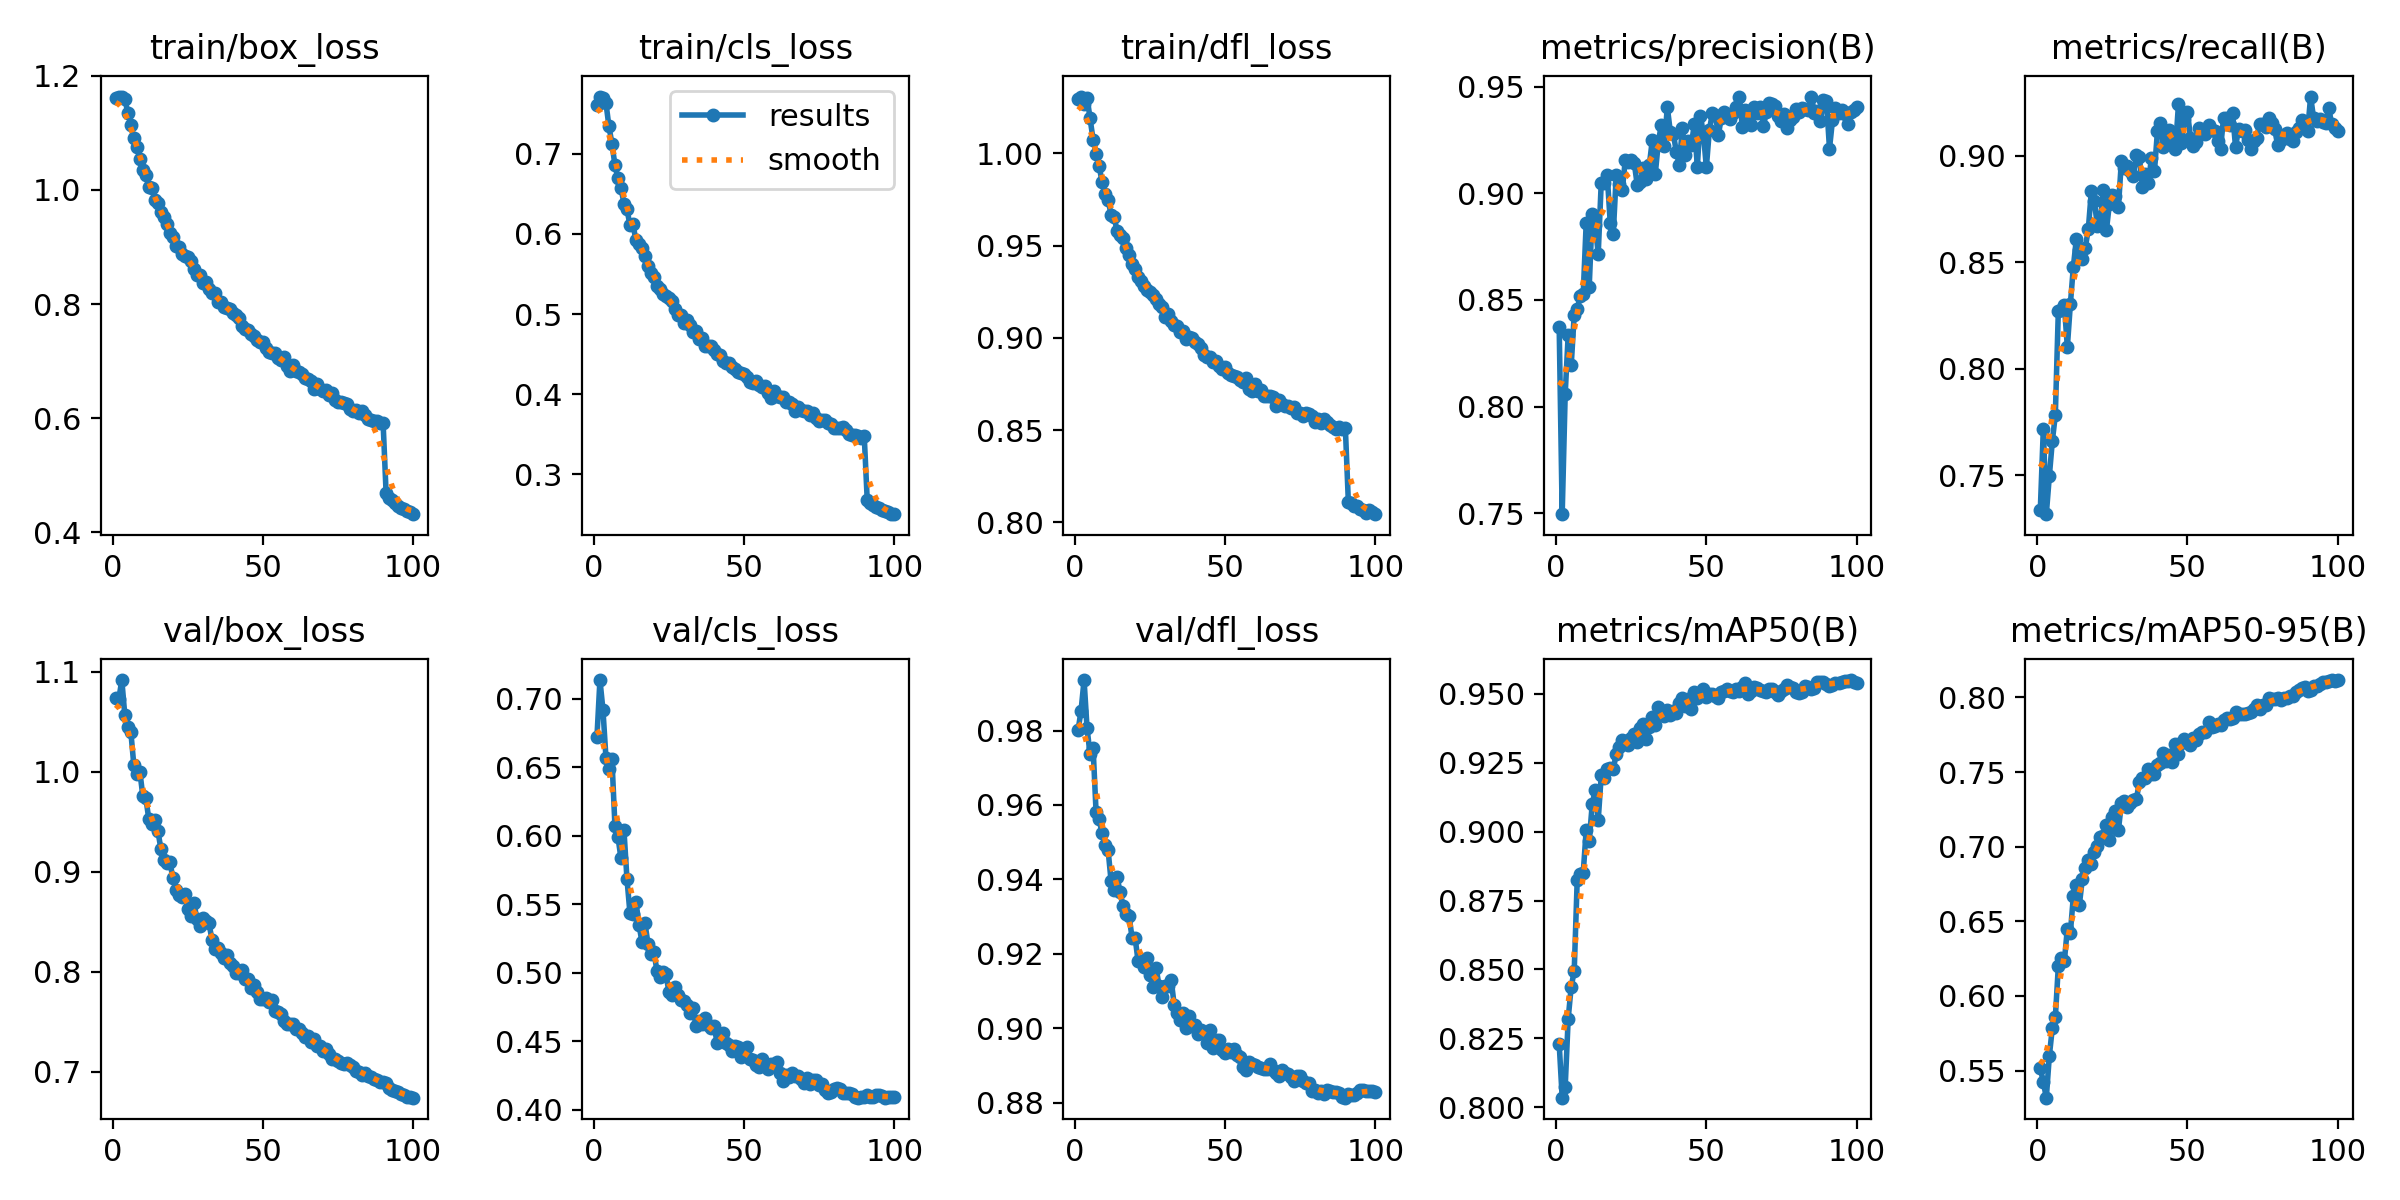

In [ ]:
display(Image(filename='/content/runs/detect/yolov8s_custom_finetune2/results.png'))

In [ ]:
# Load the trained model
model = YOLO('best.pt')

metrics = model.val(
    data='traffic-detection-project/data.yaml',
    split='test'
)

Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 18.1±6.6 MB/s, size: 62.5 KB)


val: Scanning /kaggle/input/traffic-detection-project/test/labels... 279 images, 9 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:02<00:00, 136.13it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-detection-project/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.61it/s]


                   all        279       3188      0.953       0.92      0.956      0.825
               bicycle         98        134      0.982      0.955      0.979      0.856
                   bus         36         41      0.948      0.927      0.972      0.911
                   car        259       1911      0.954      0.947      0.967      0.846
             motorbike        164        650      0.948      0.876      0.947      0.718
                person         97        452      0.935      0.894      0.917      0.795
Speed: 3.0ms preprocess, 9.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


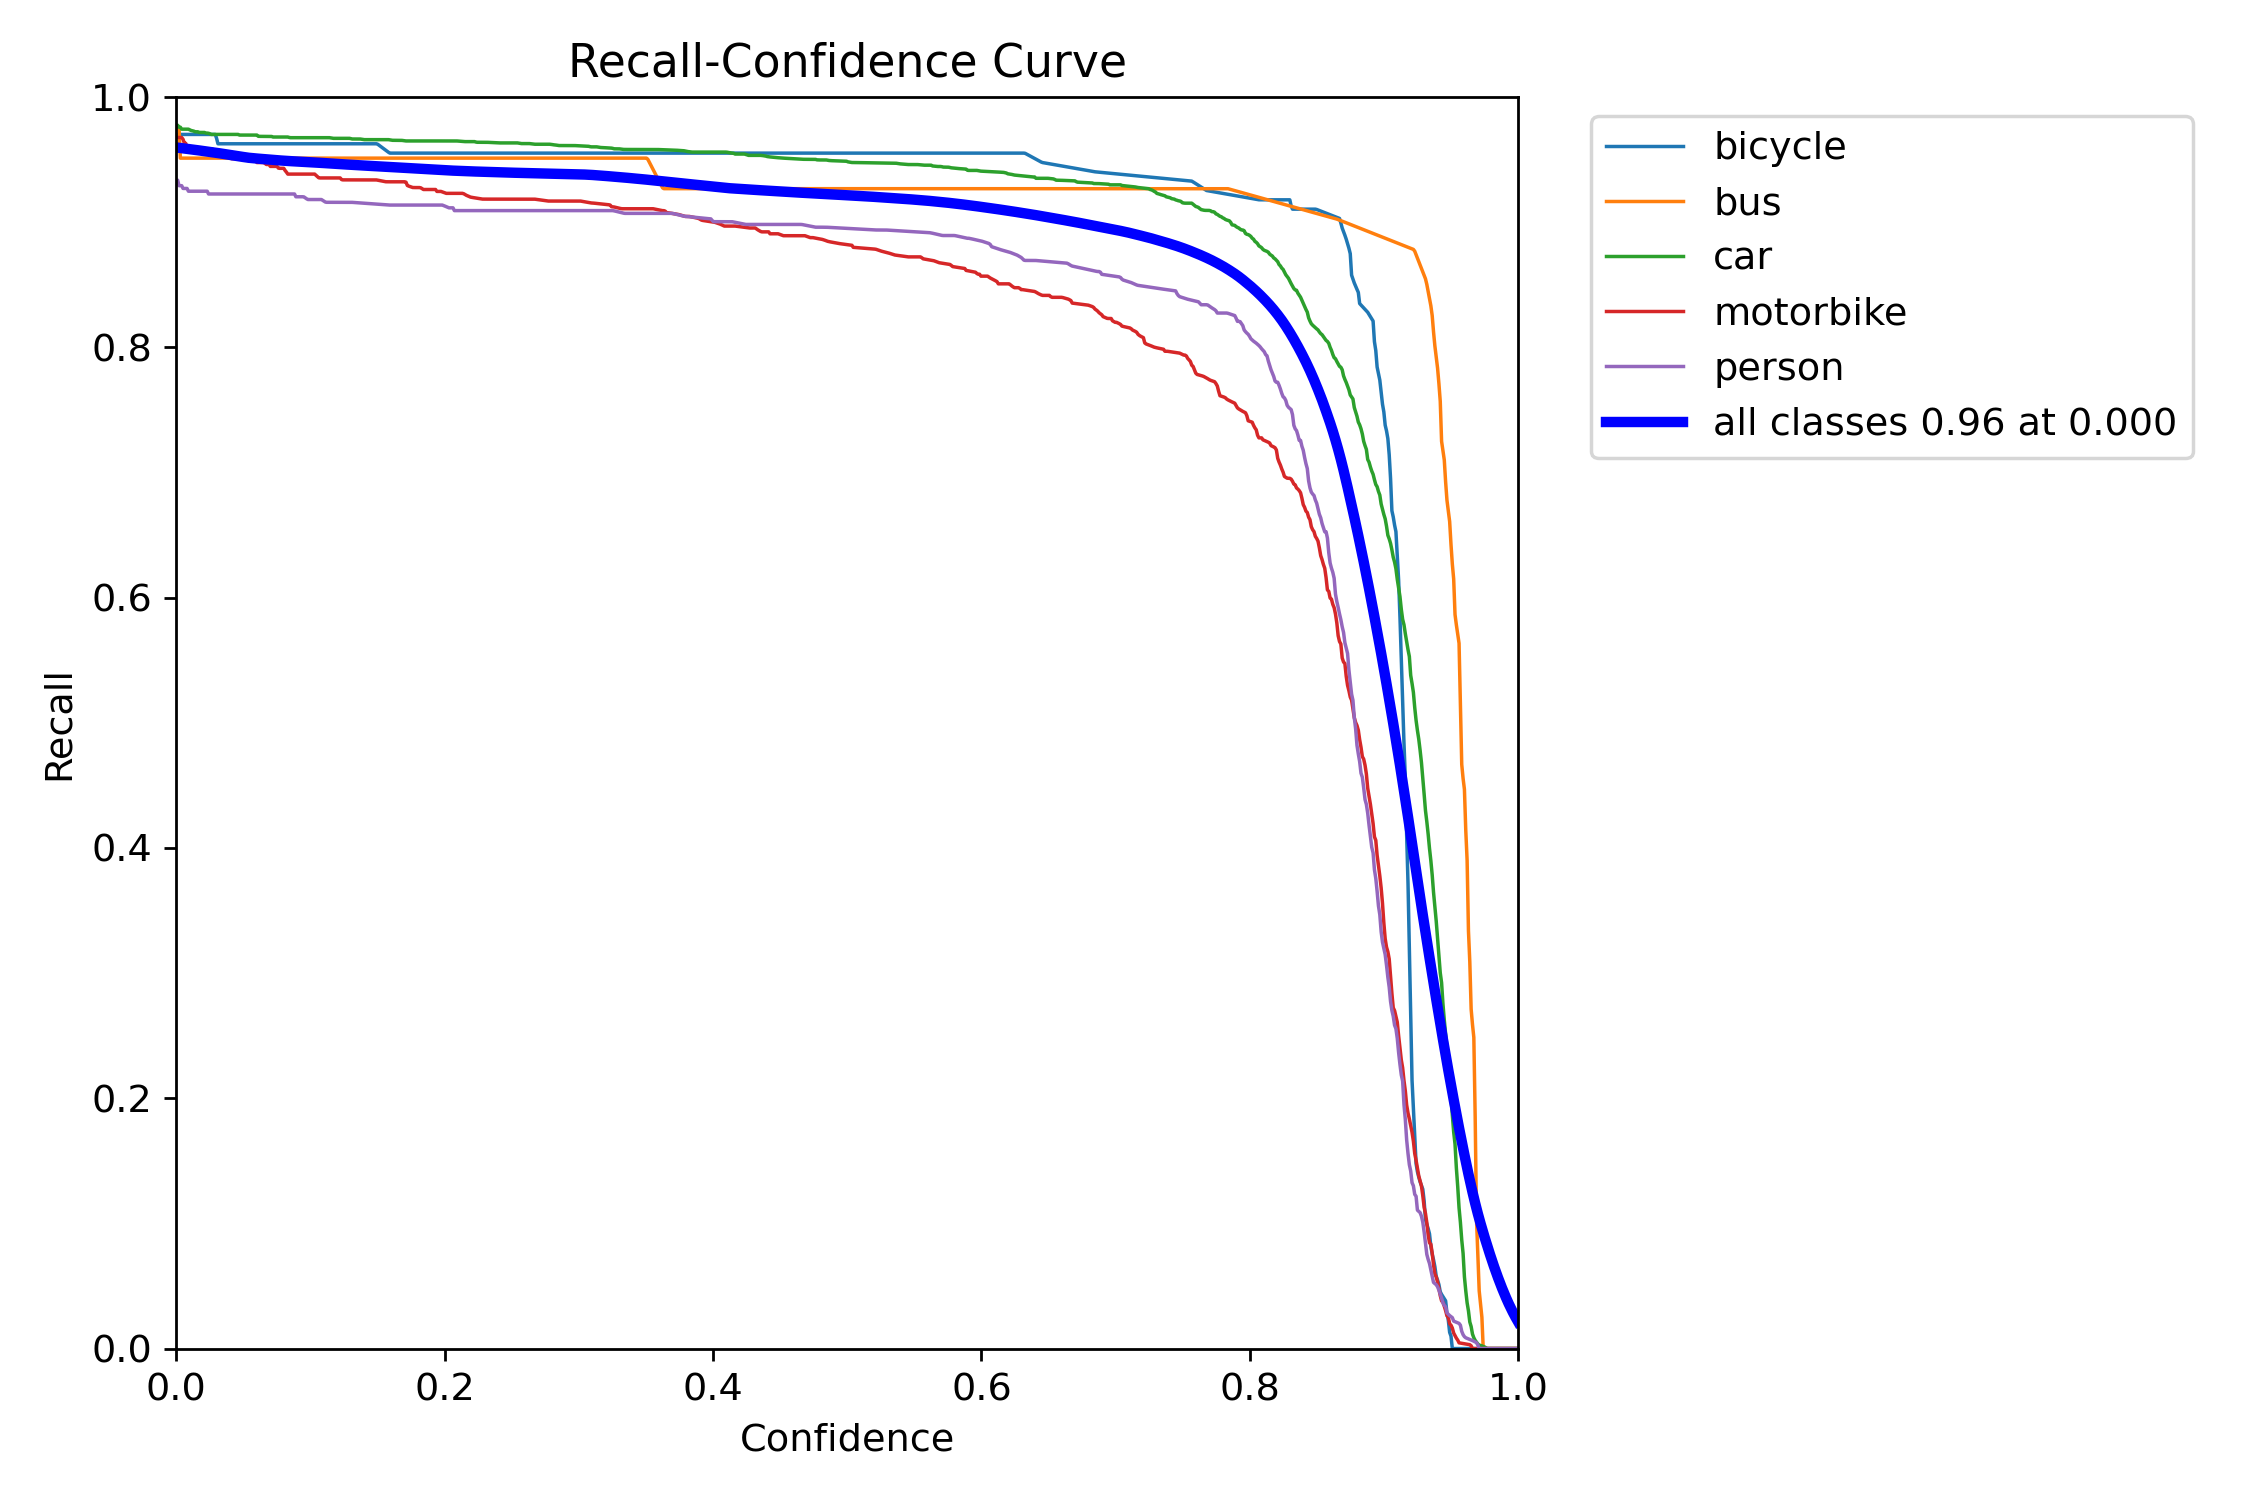

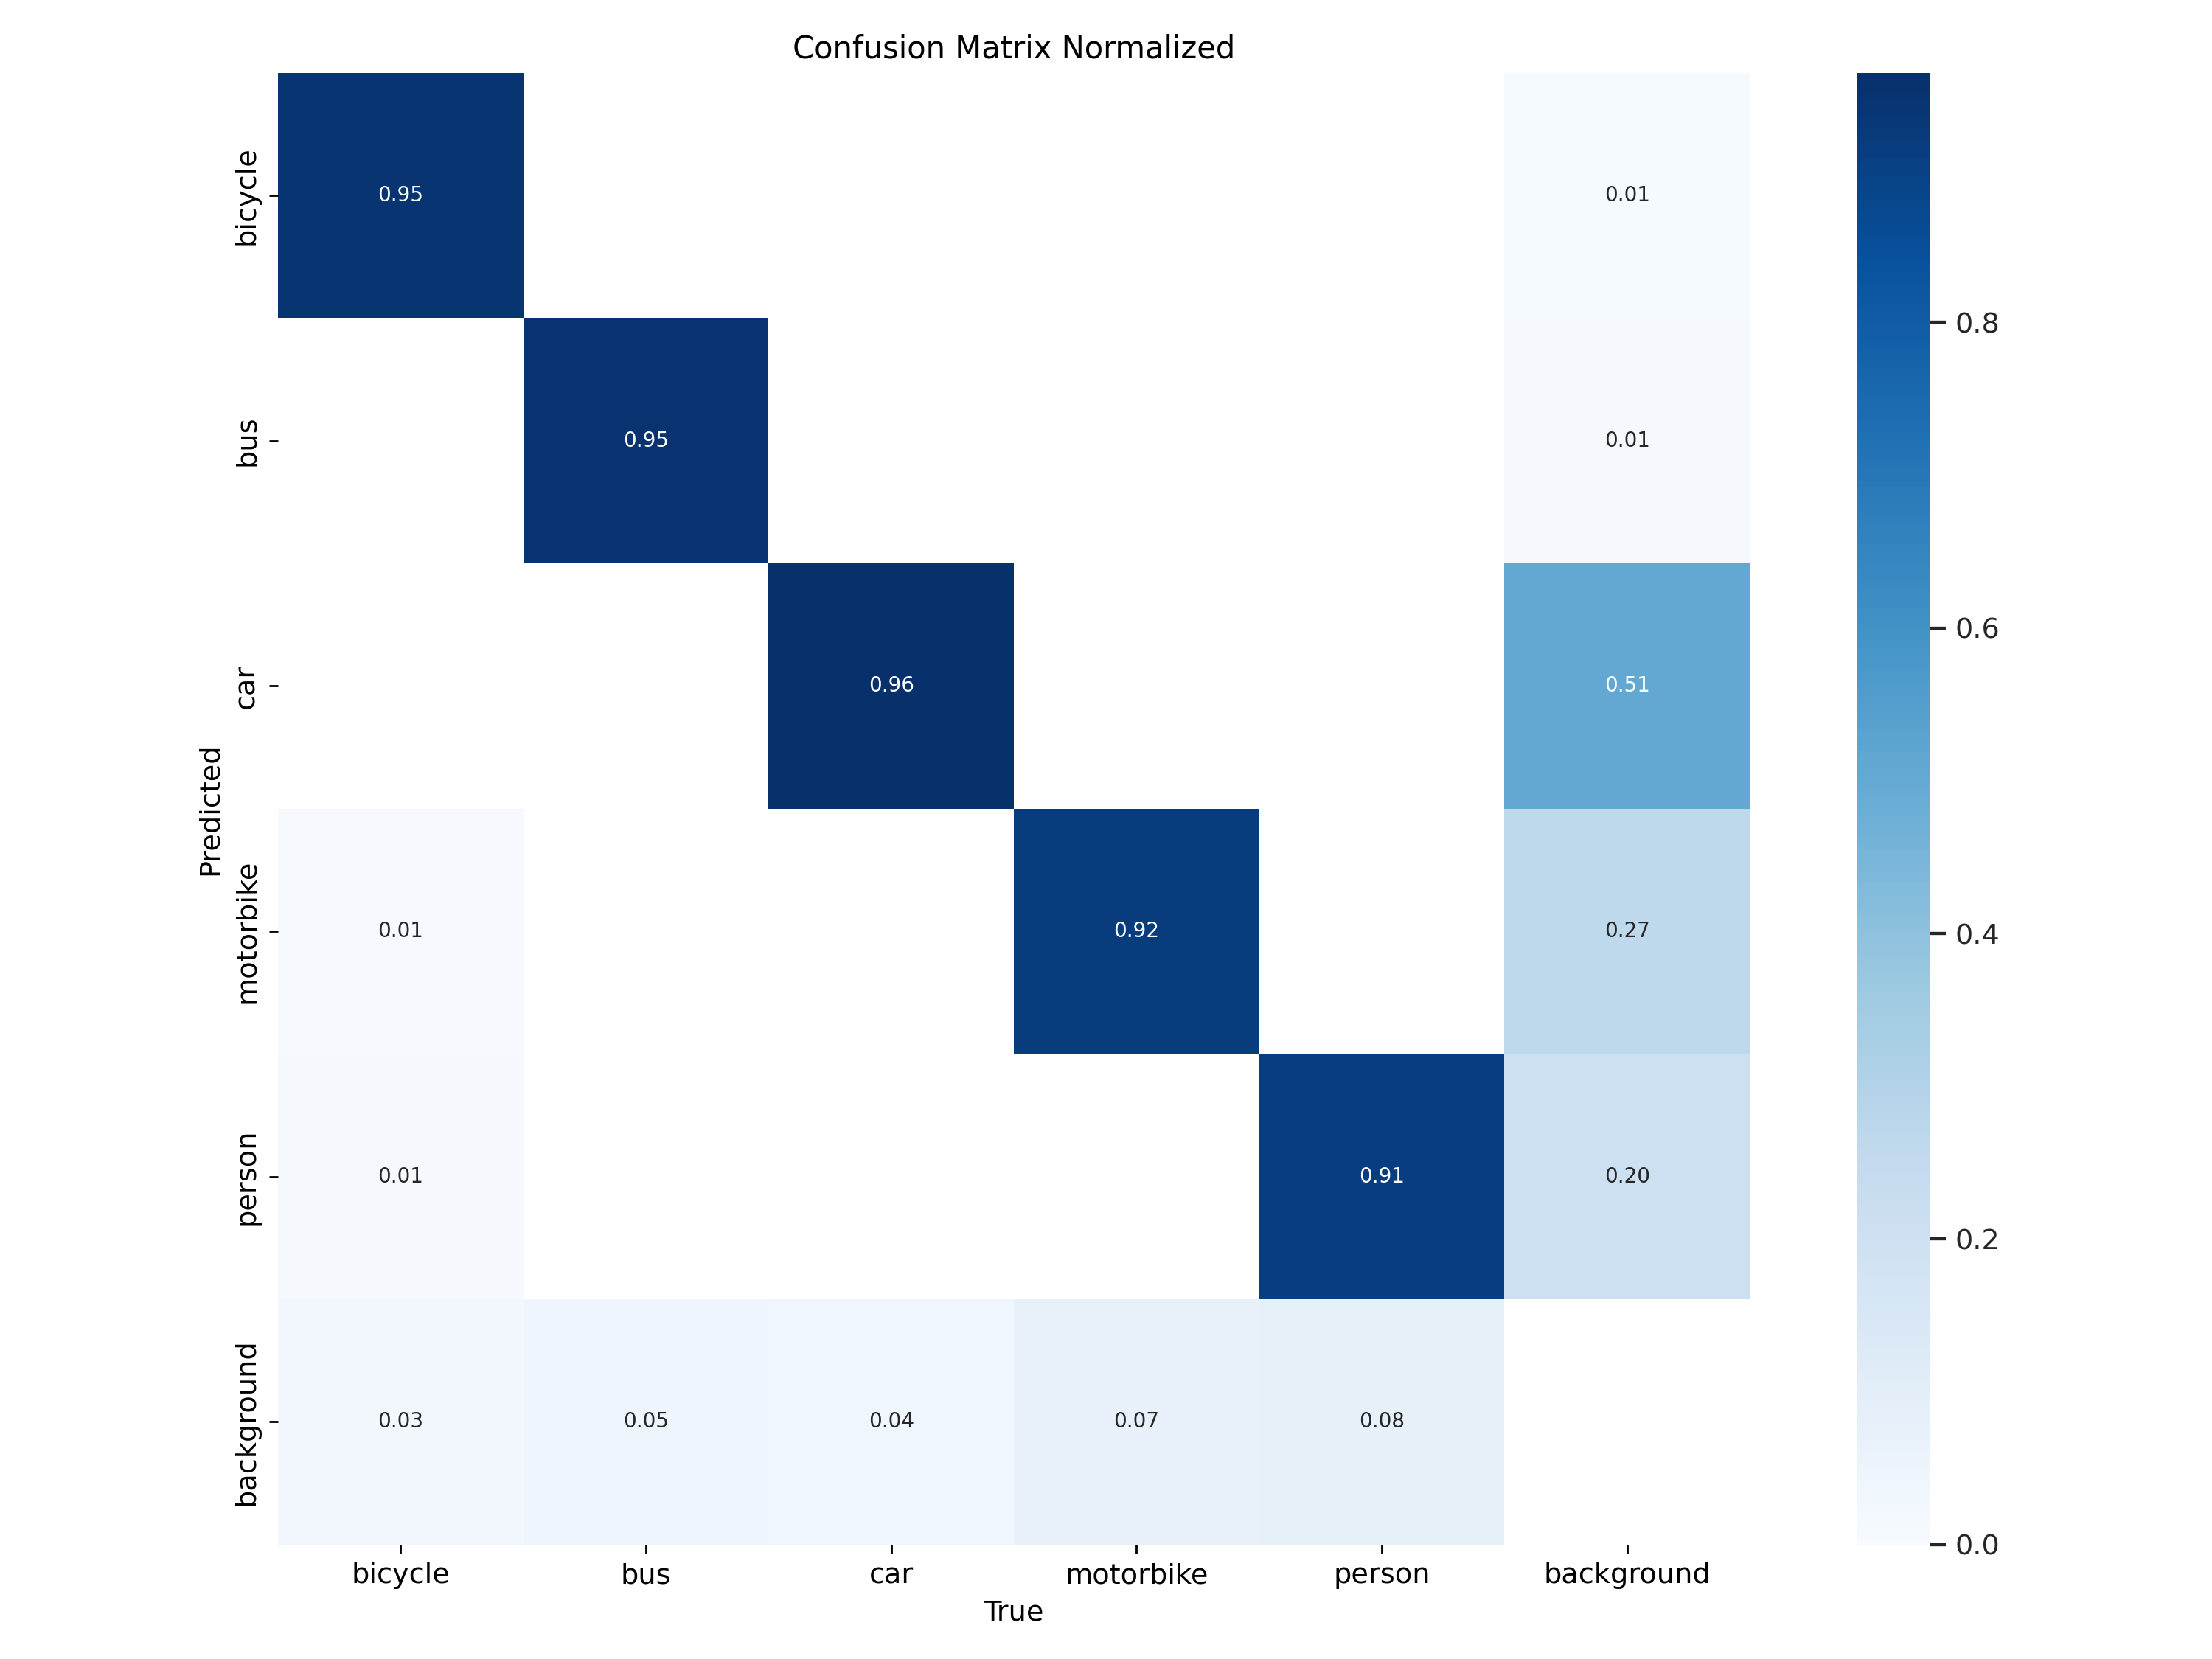

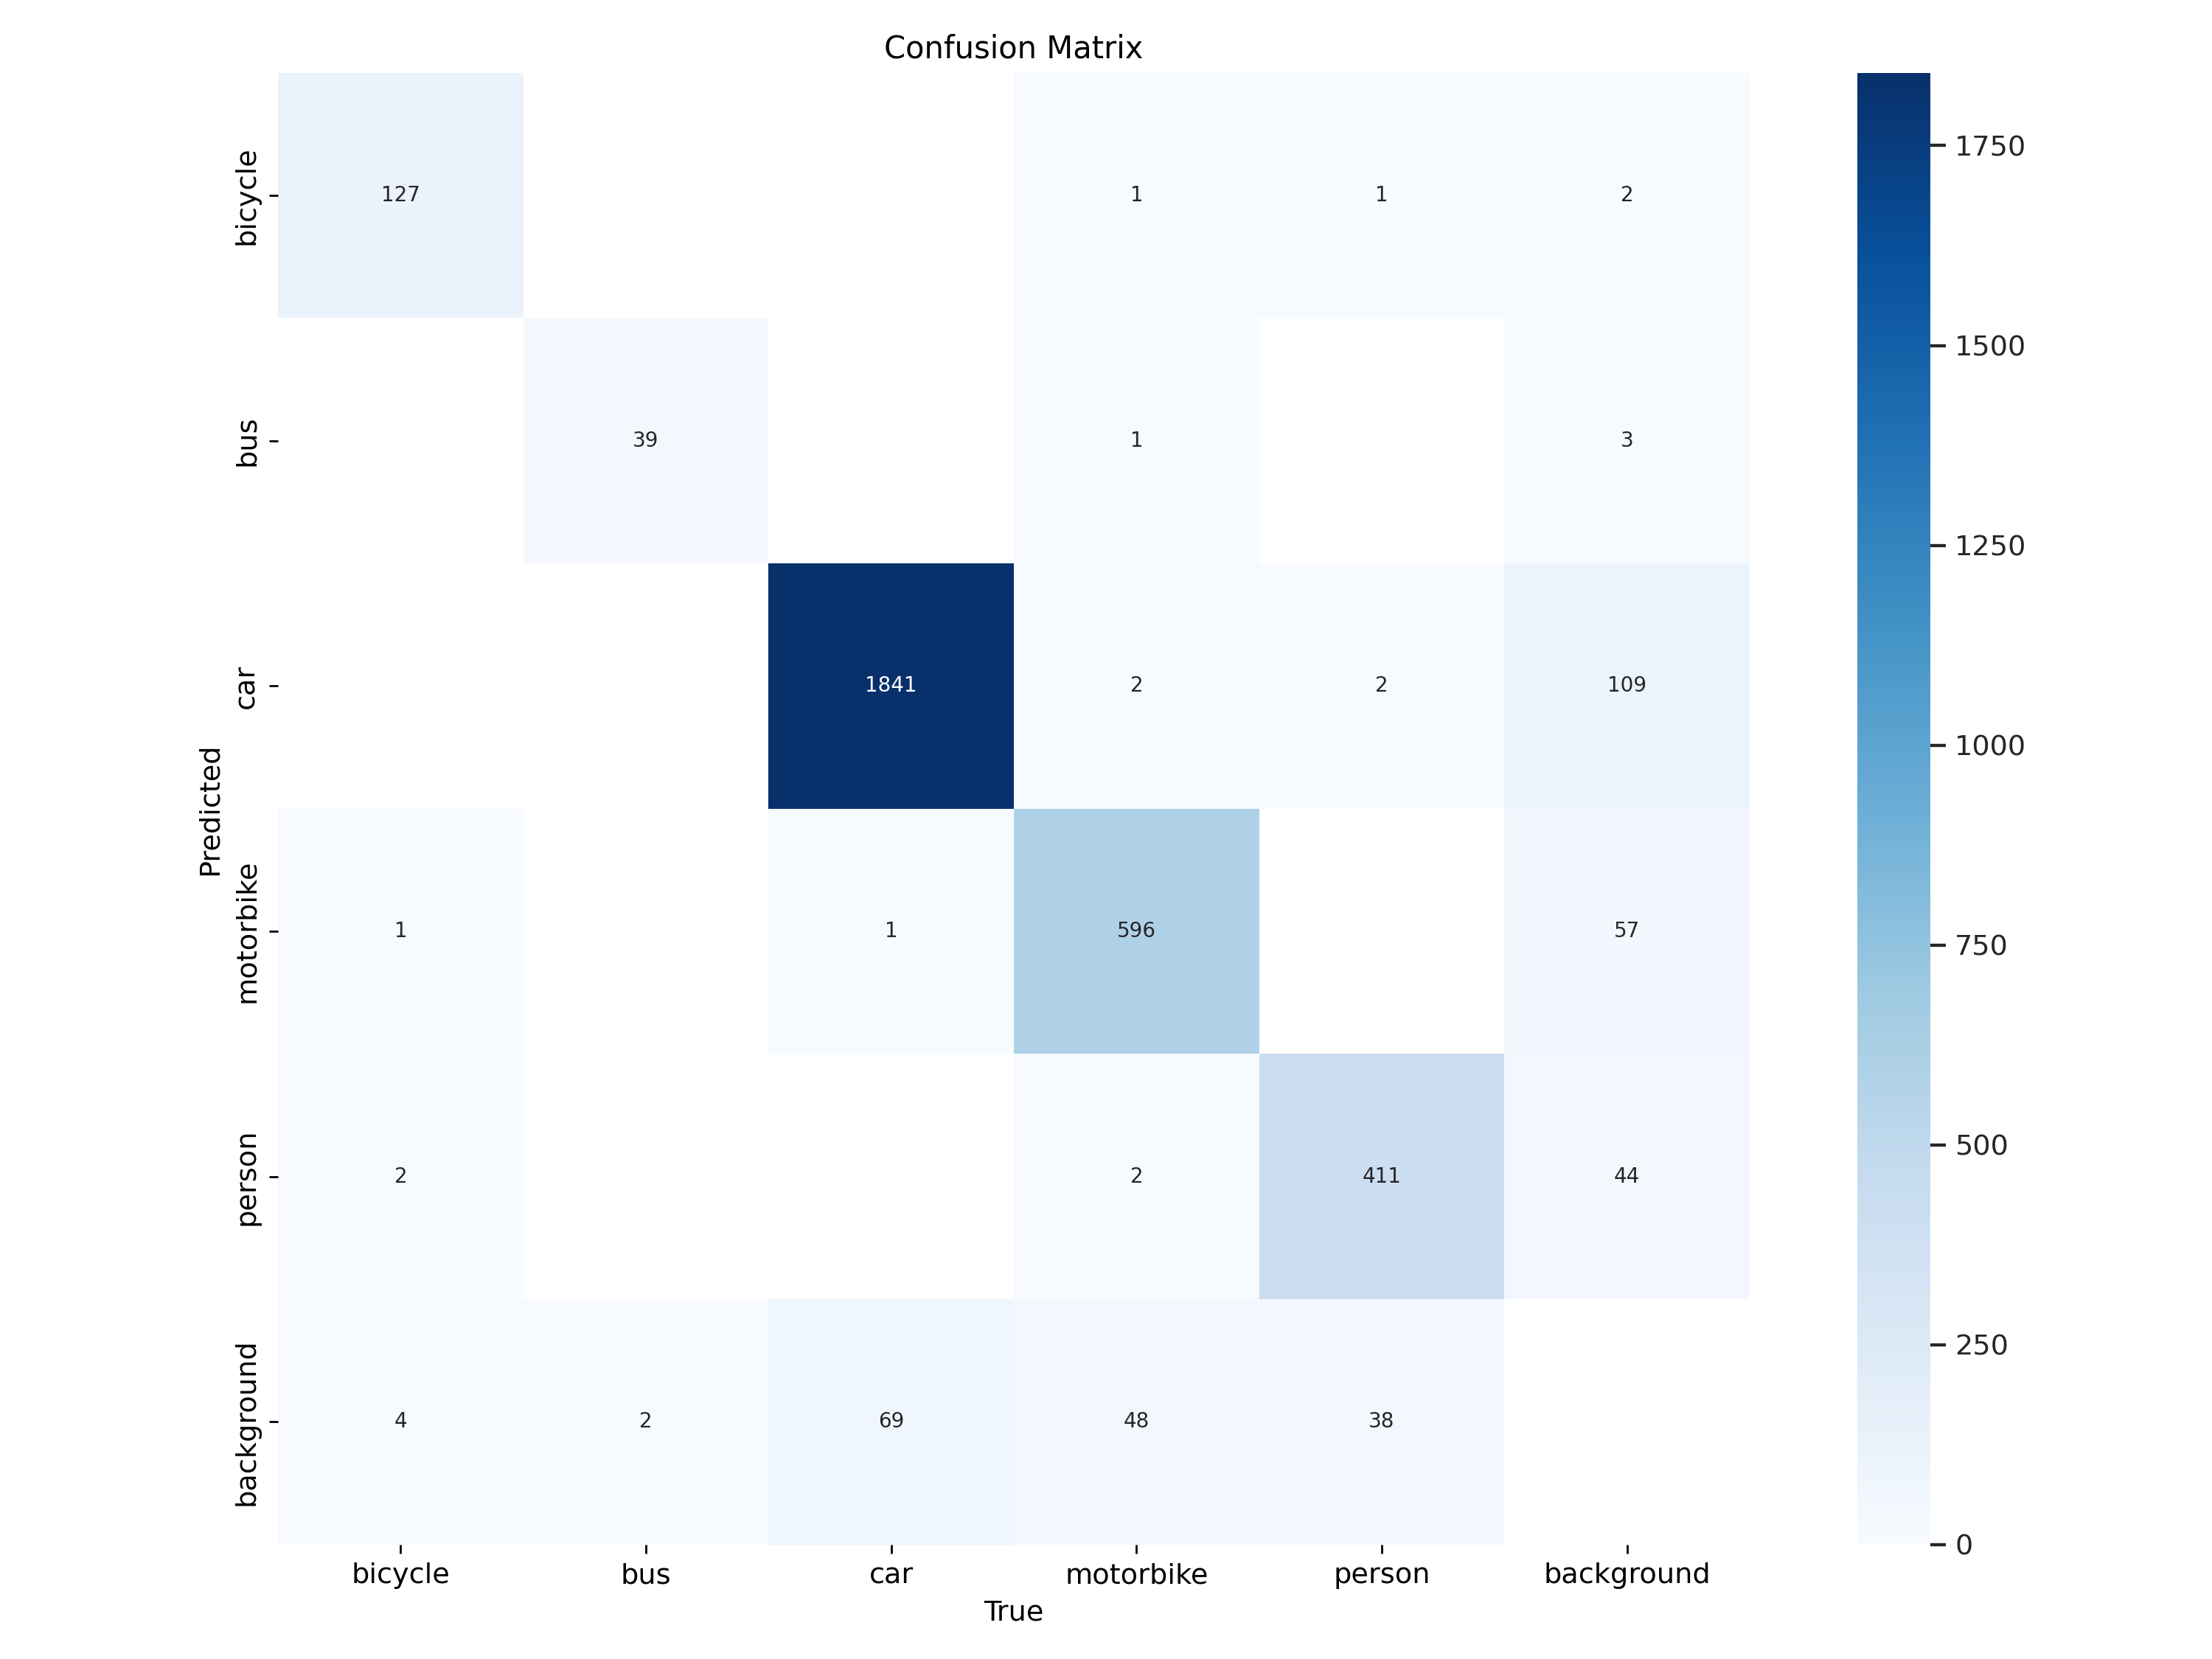

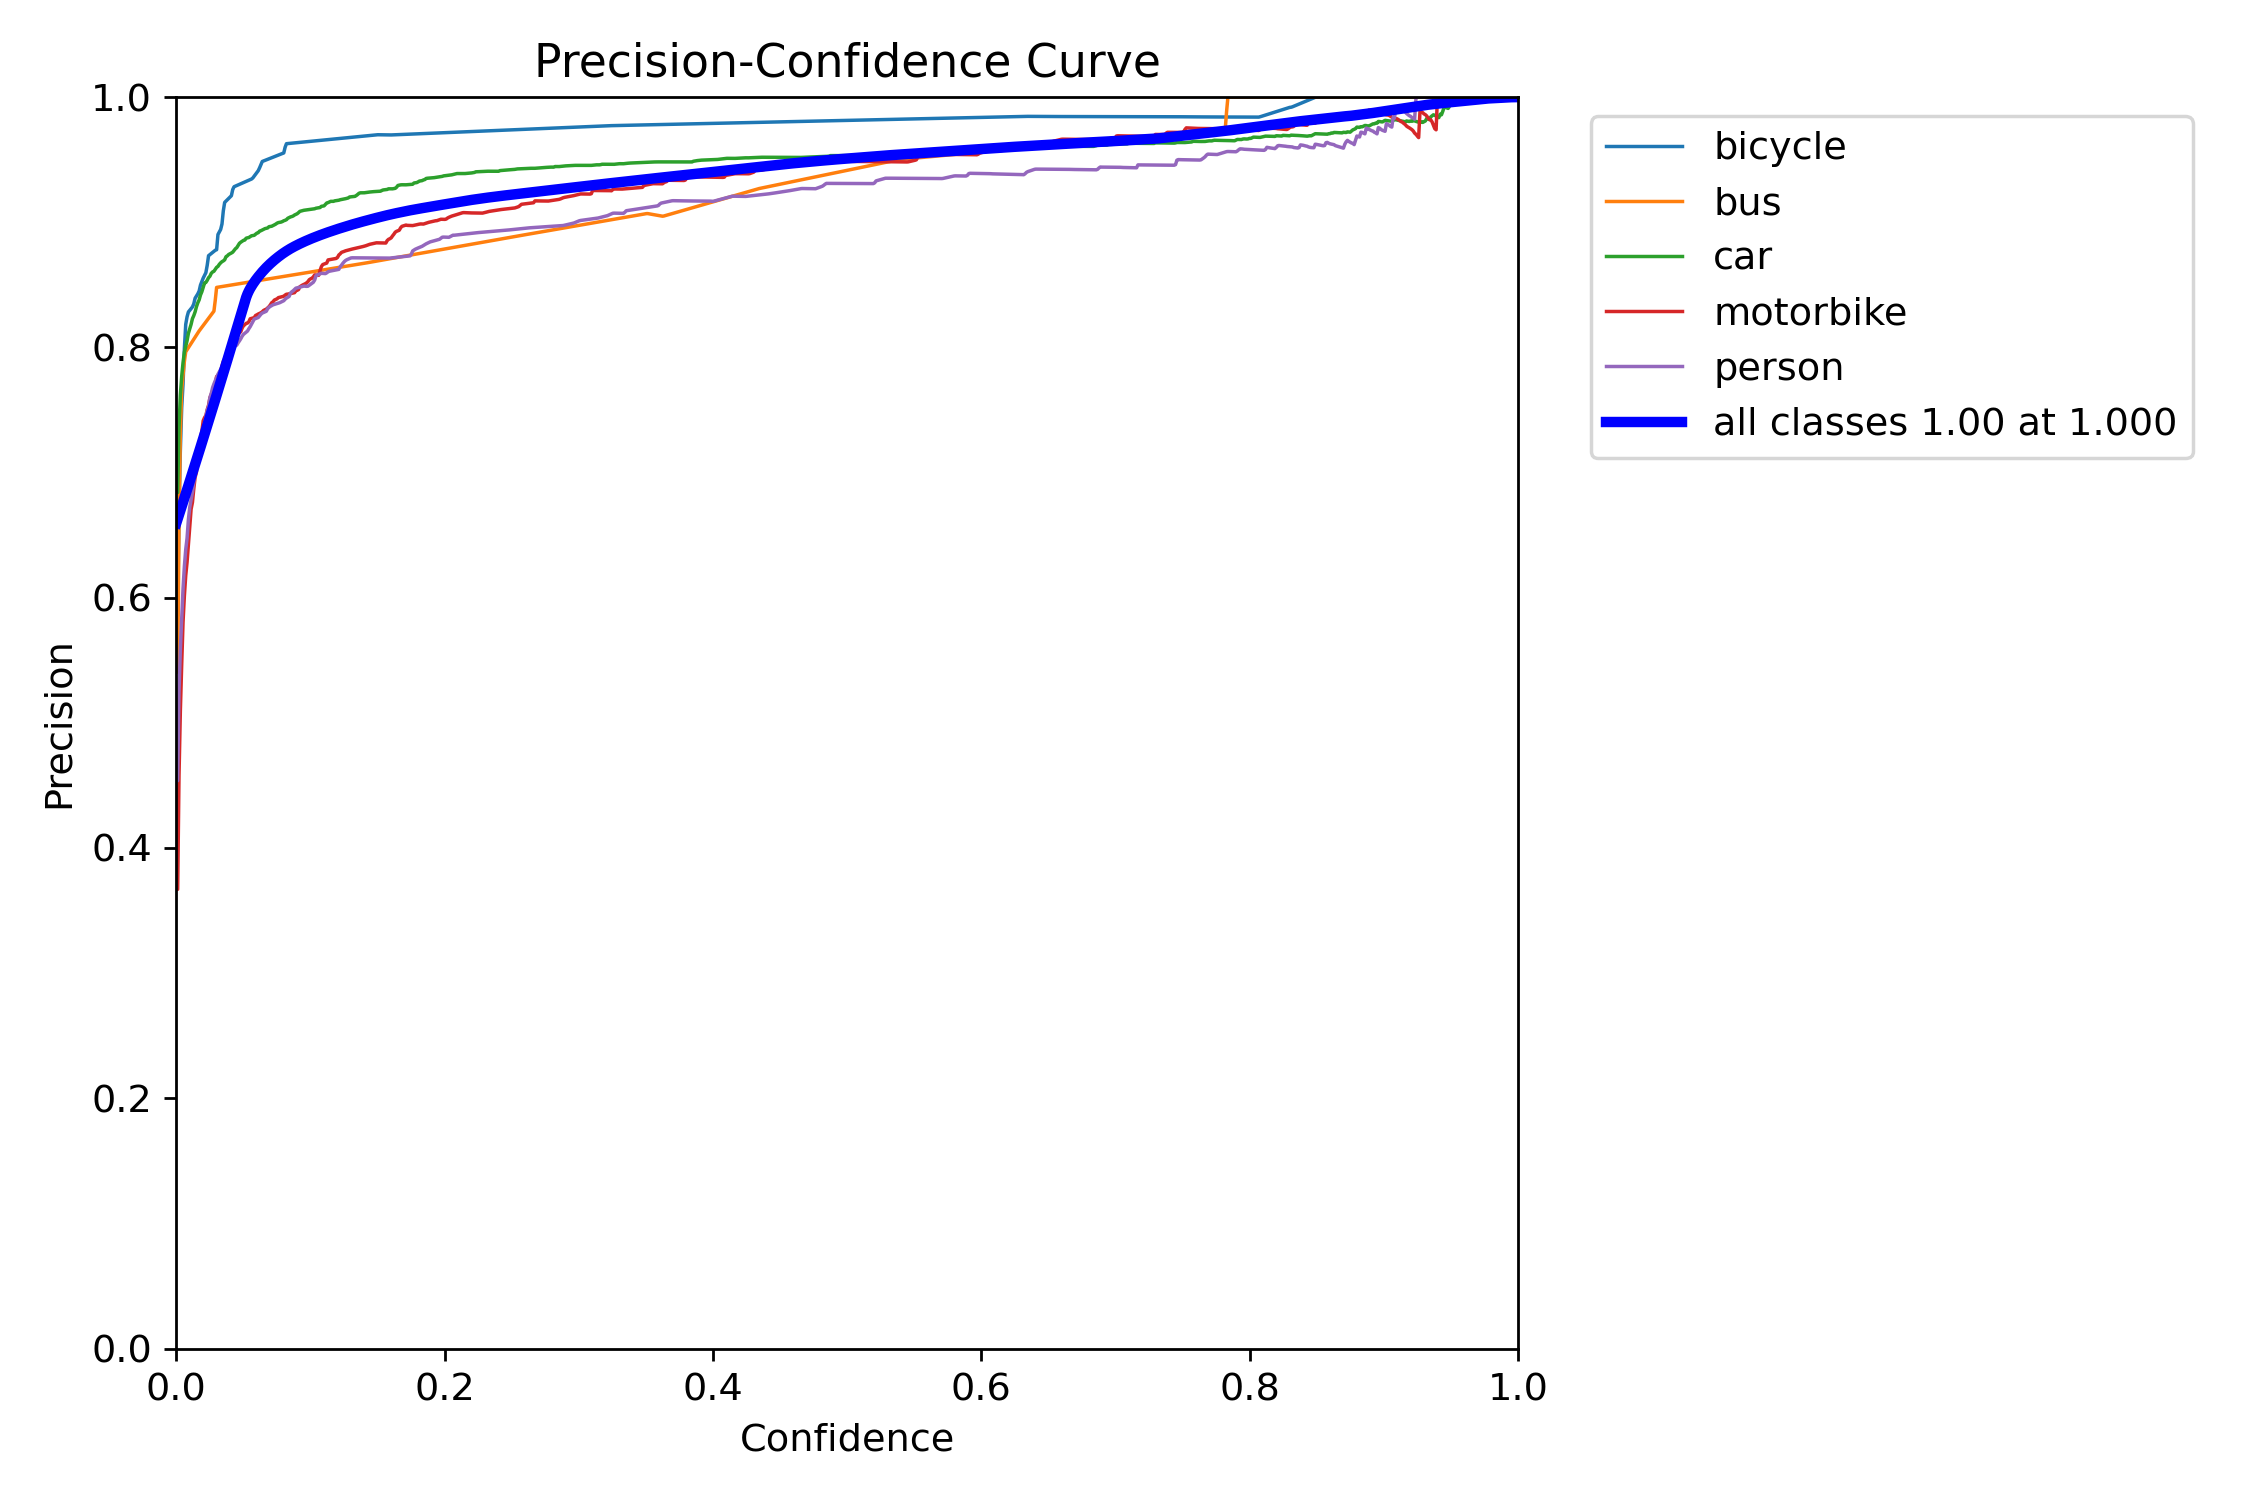

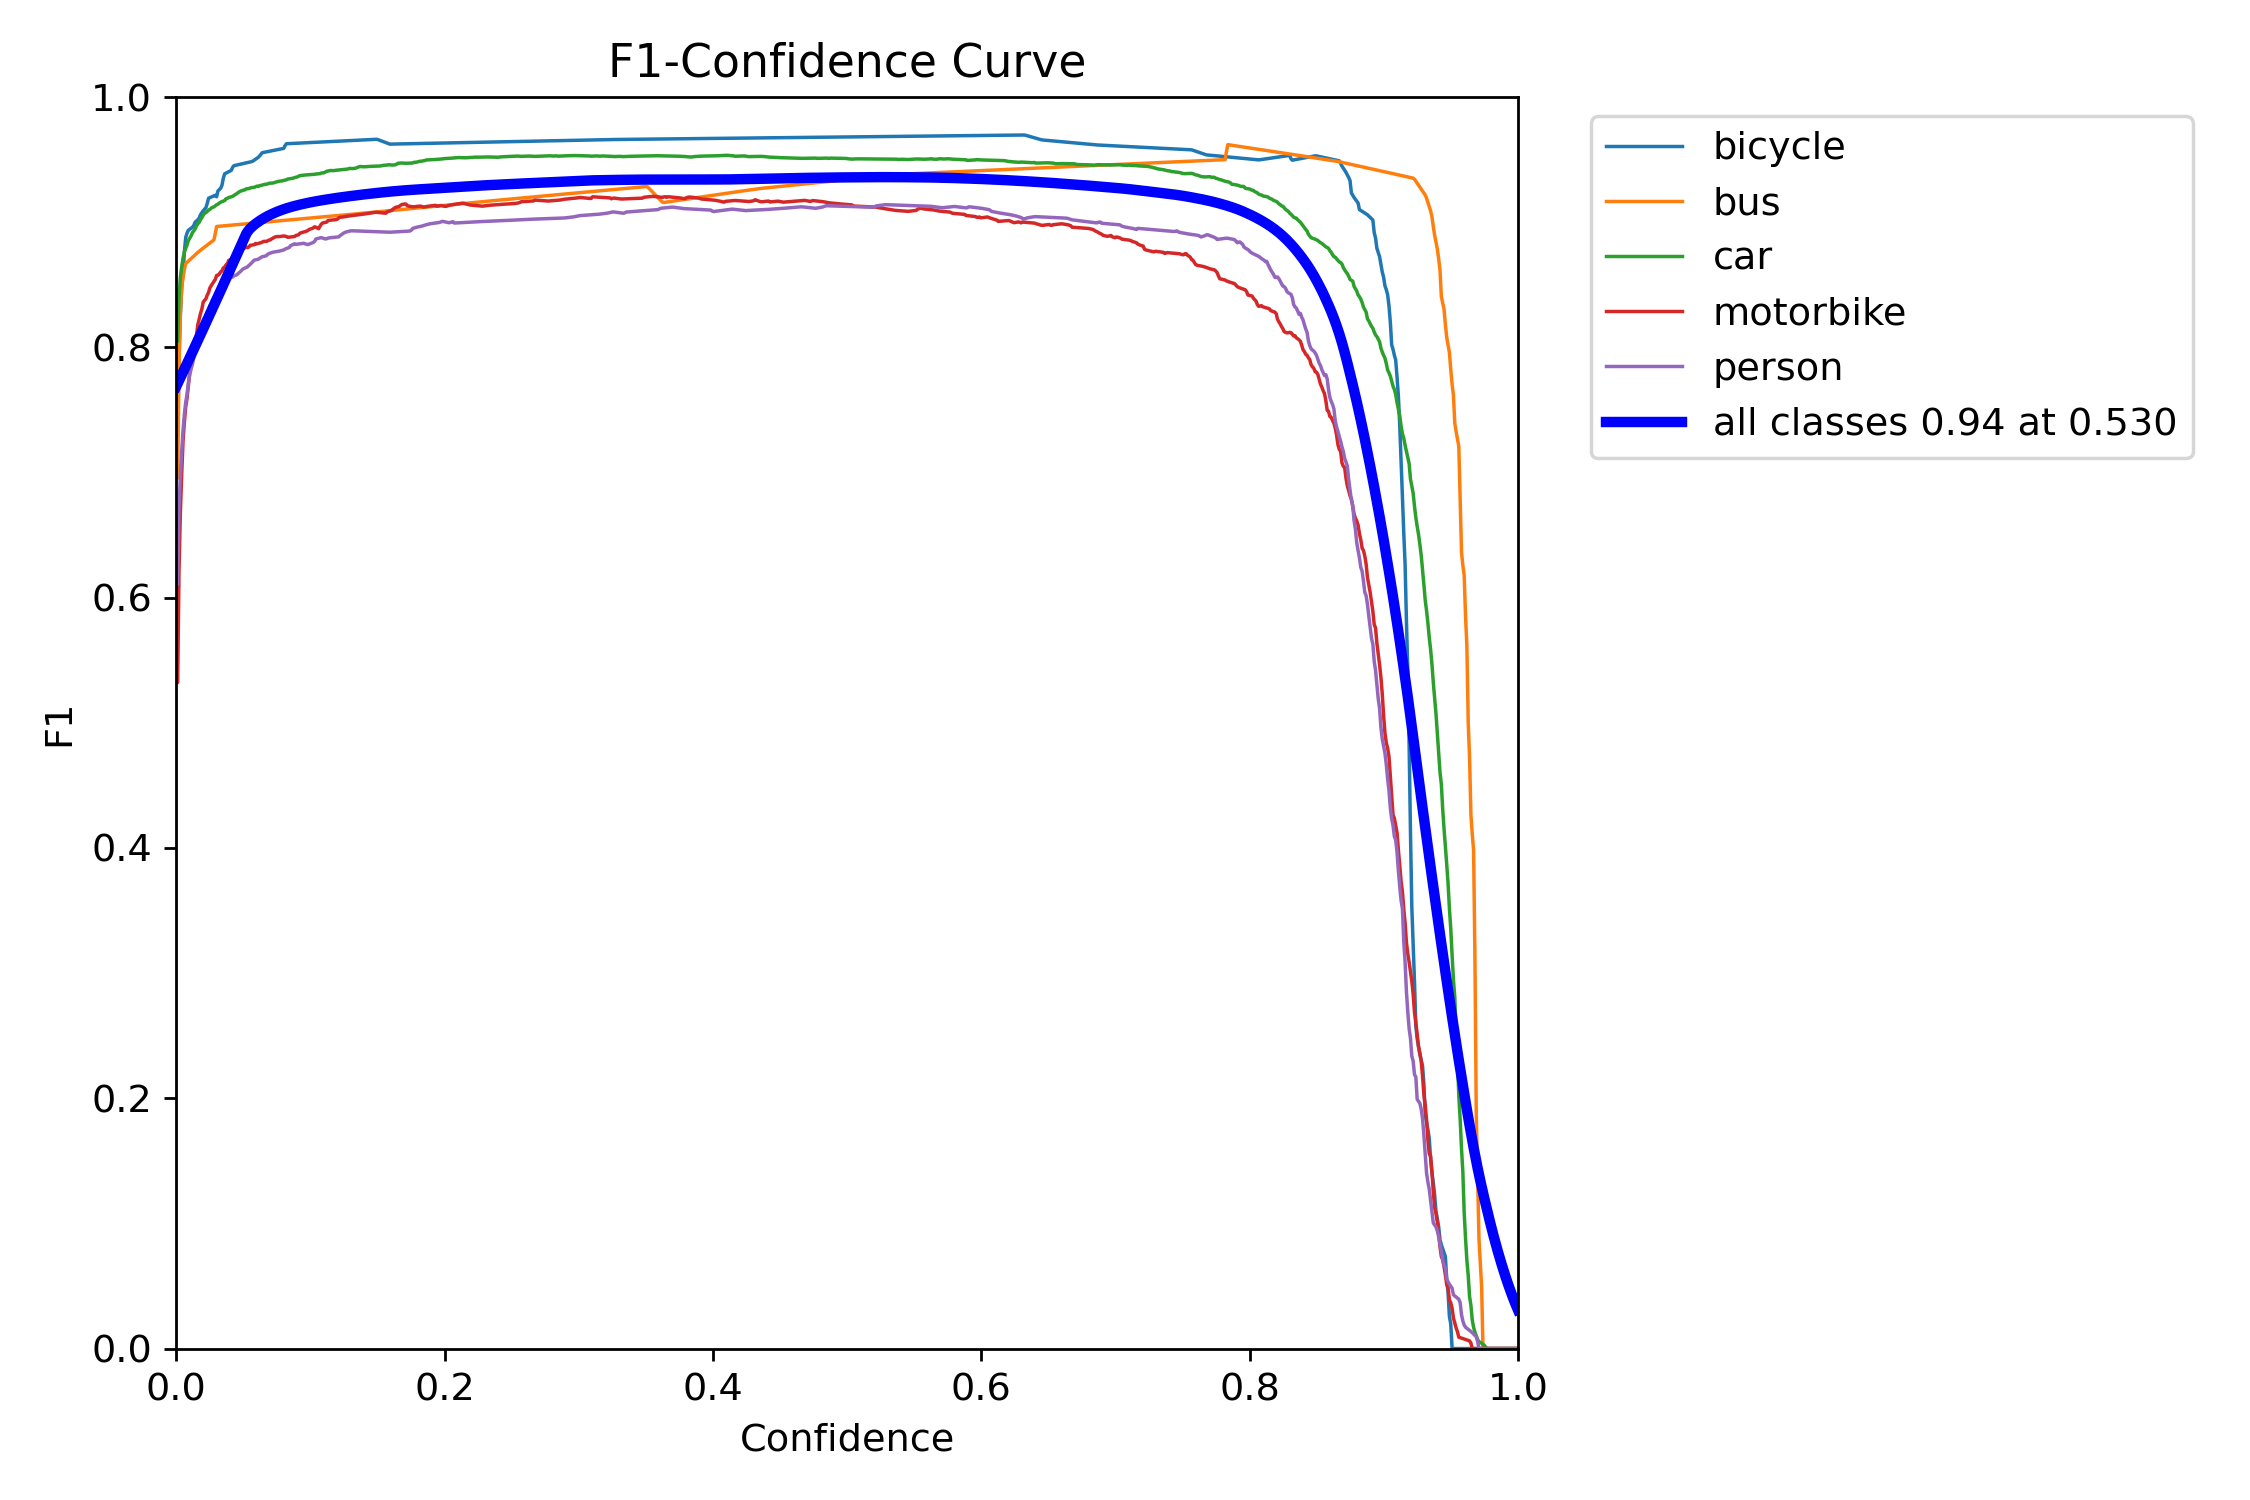

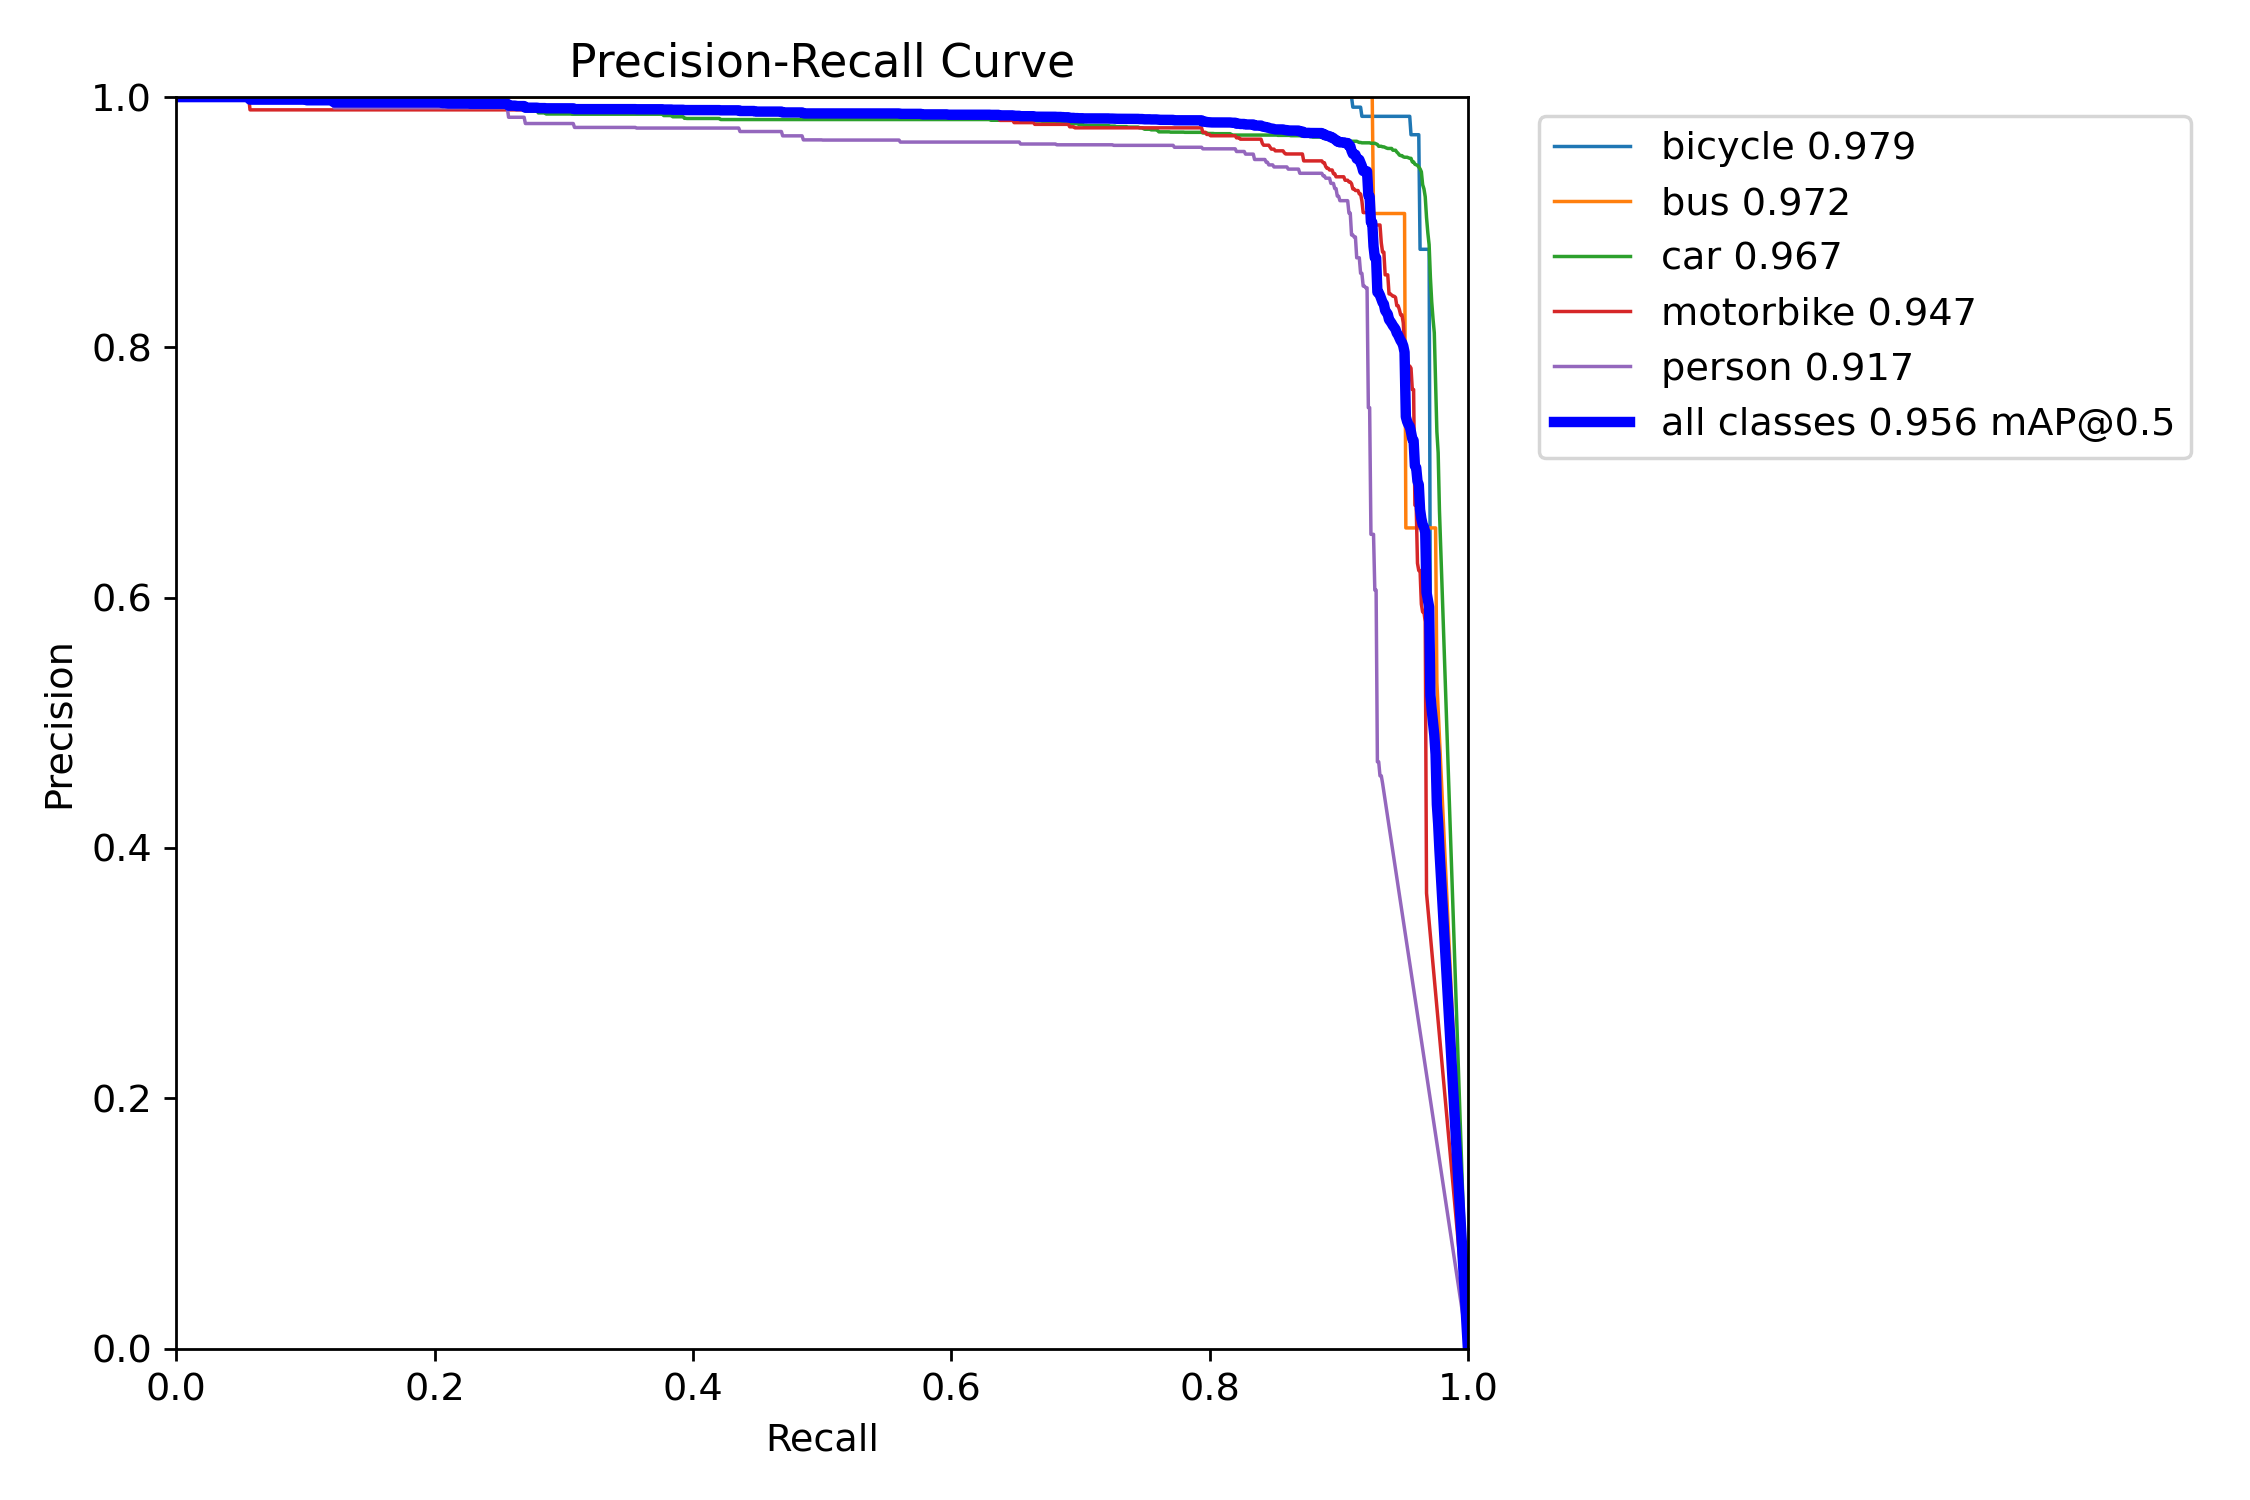

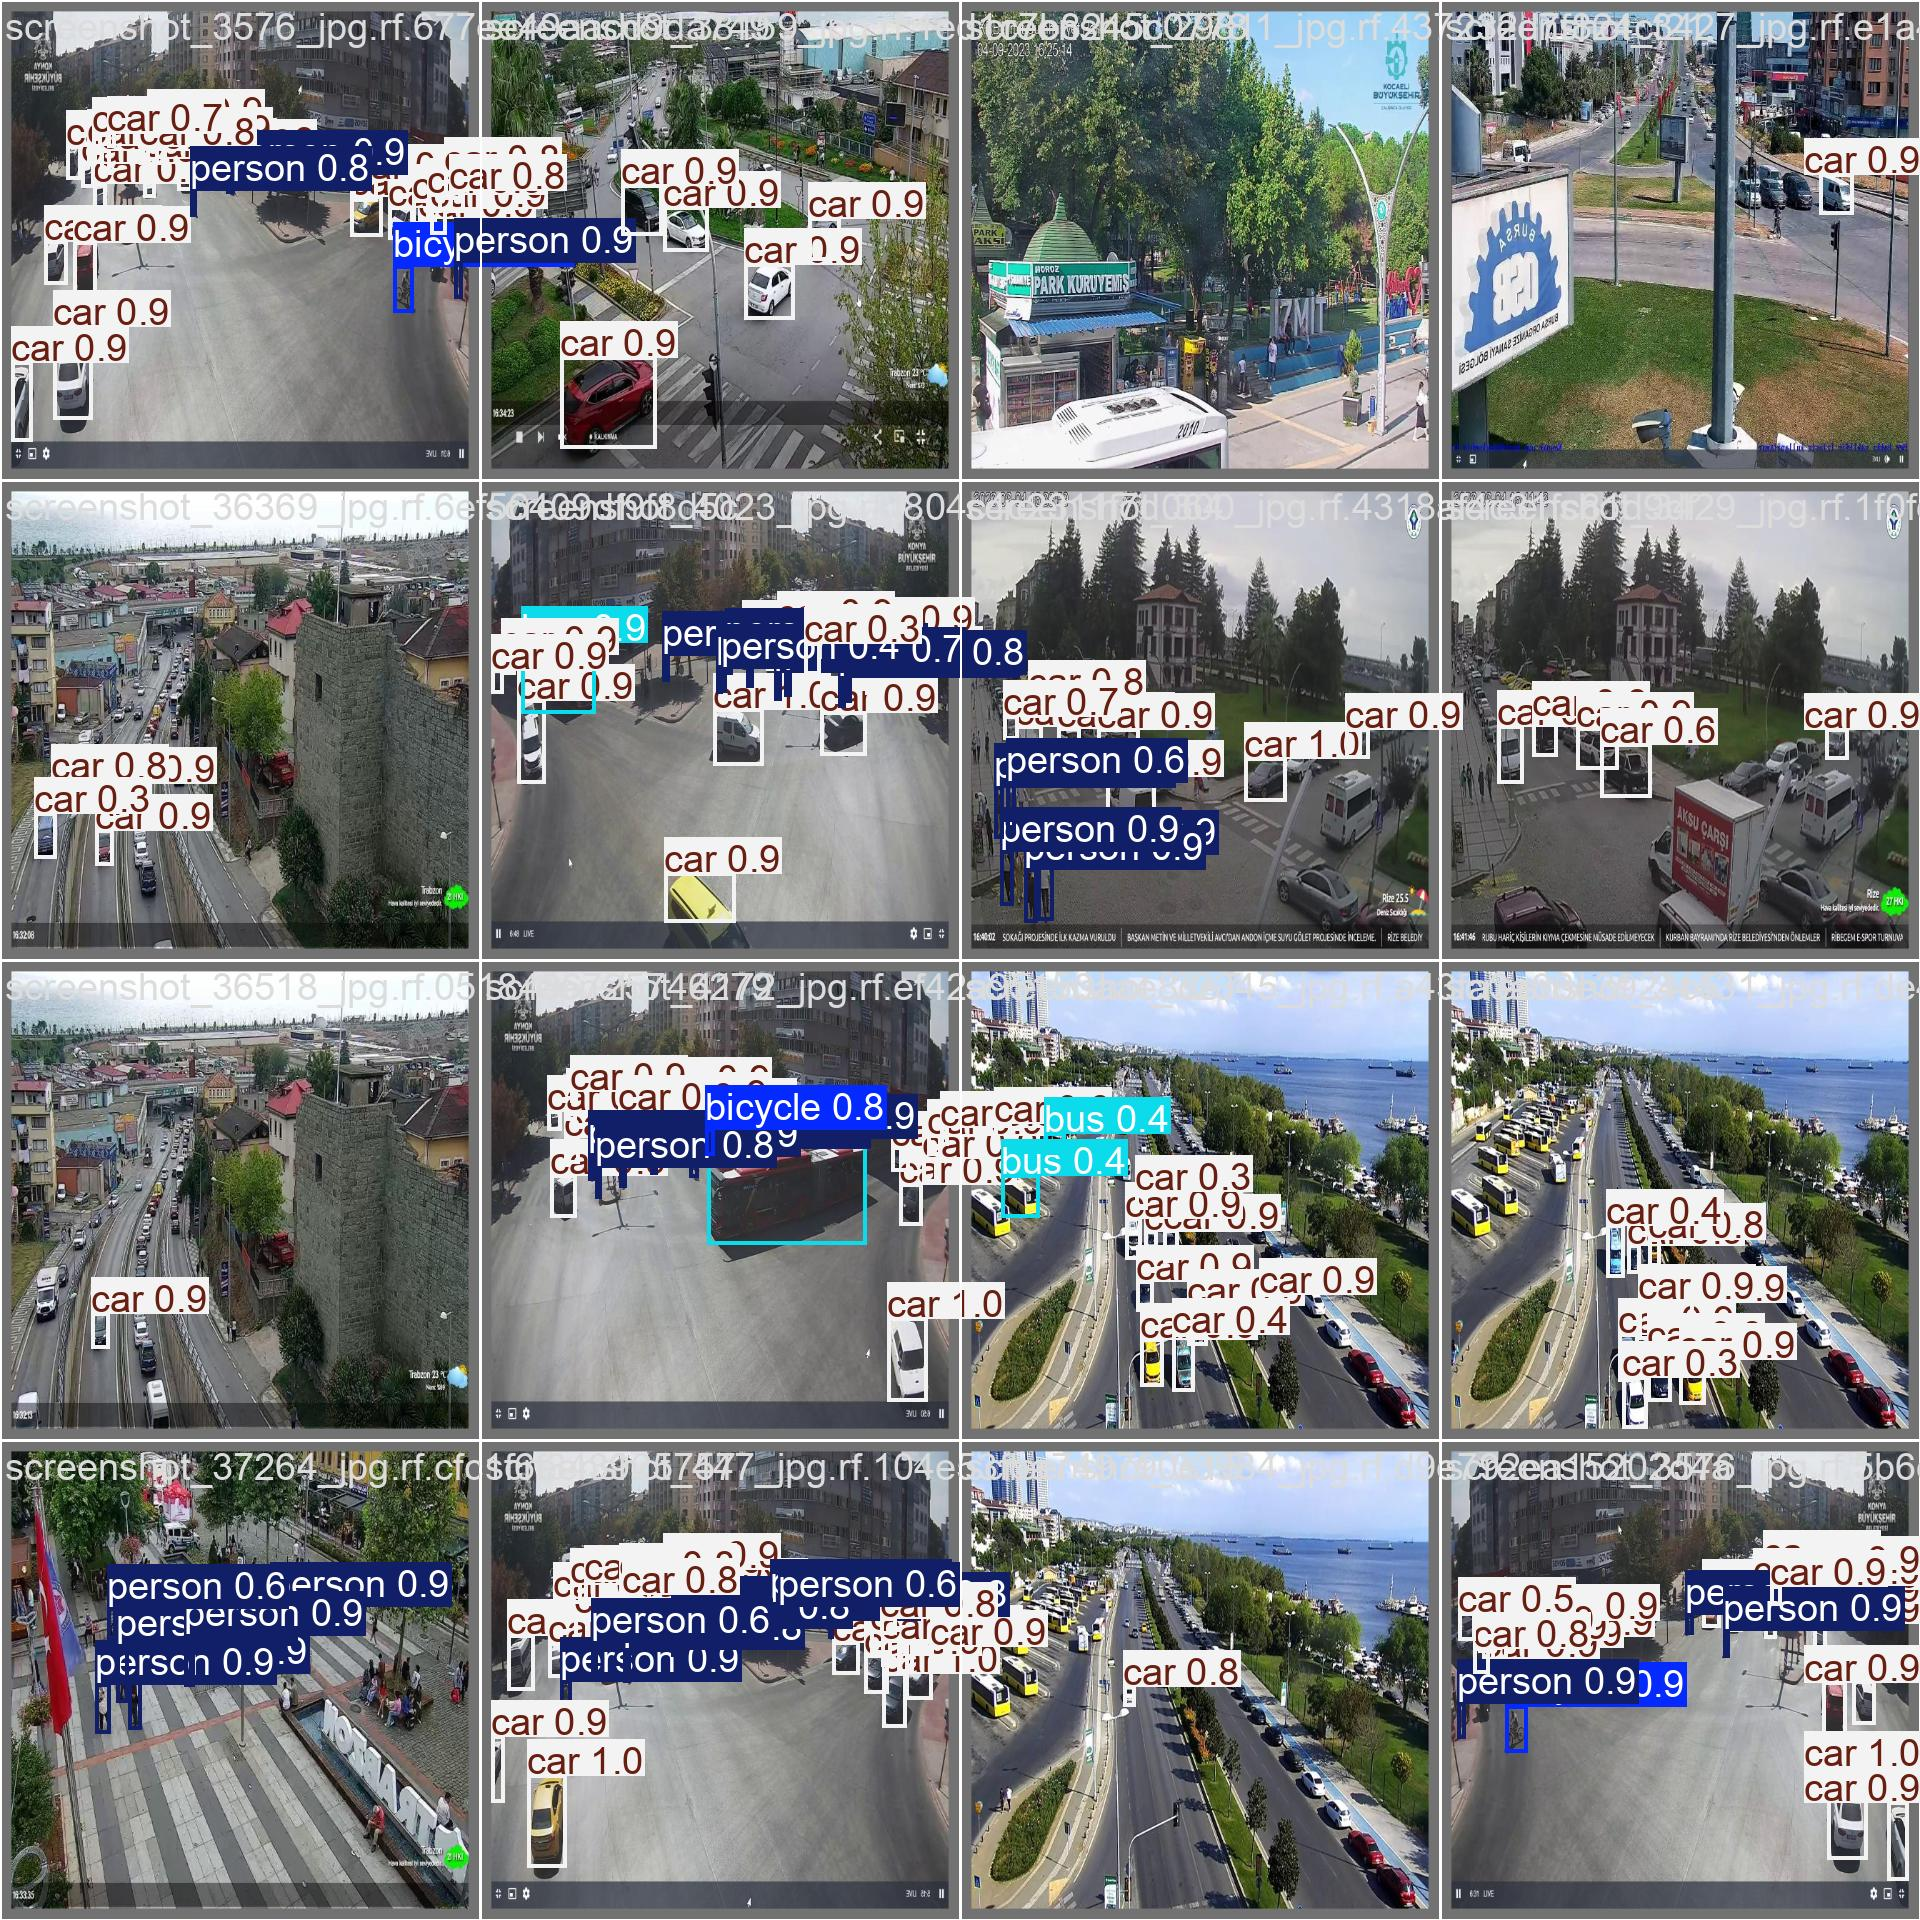

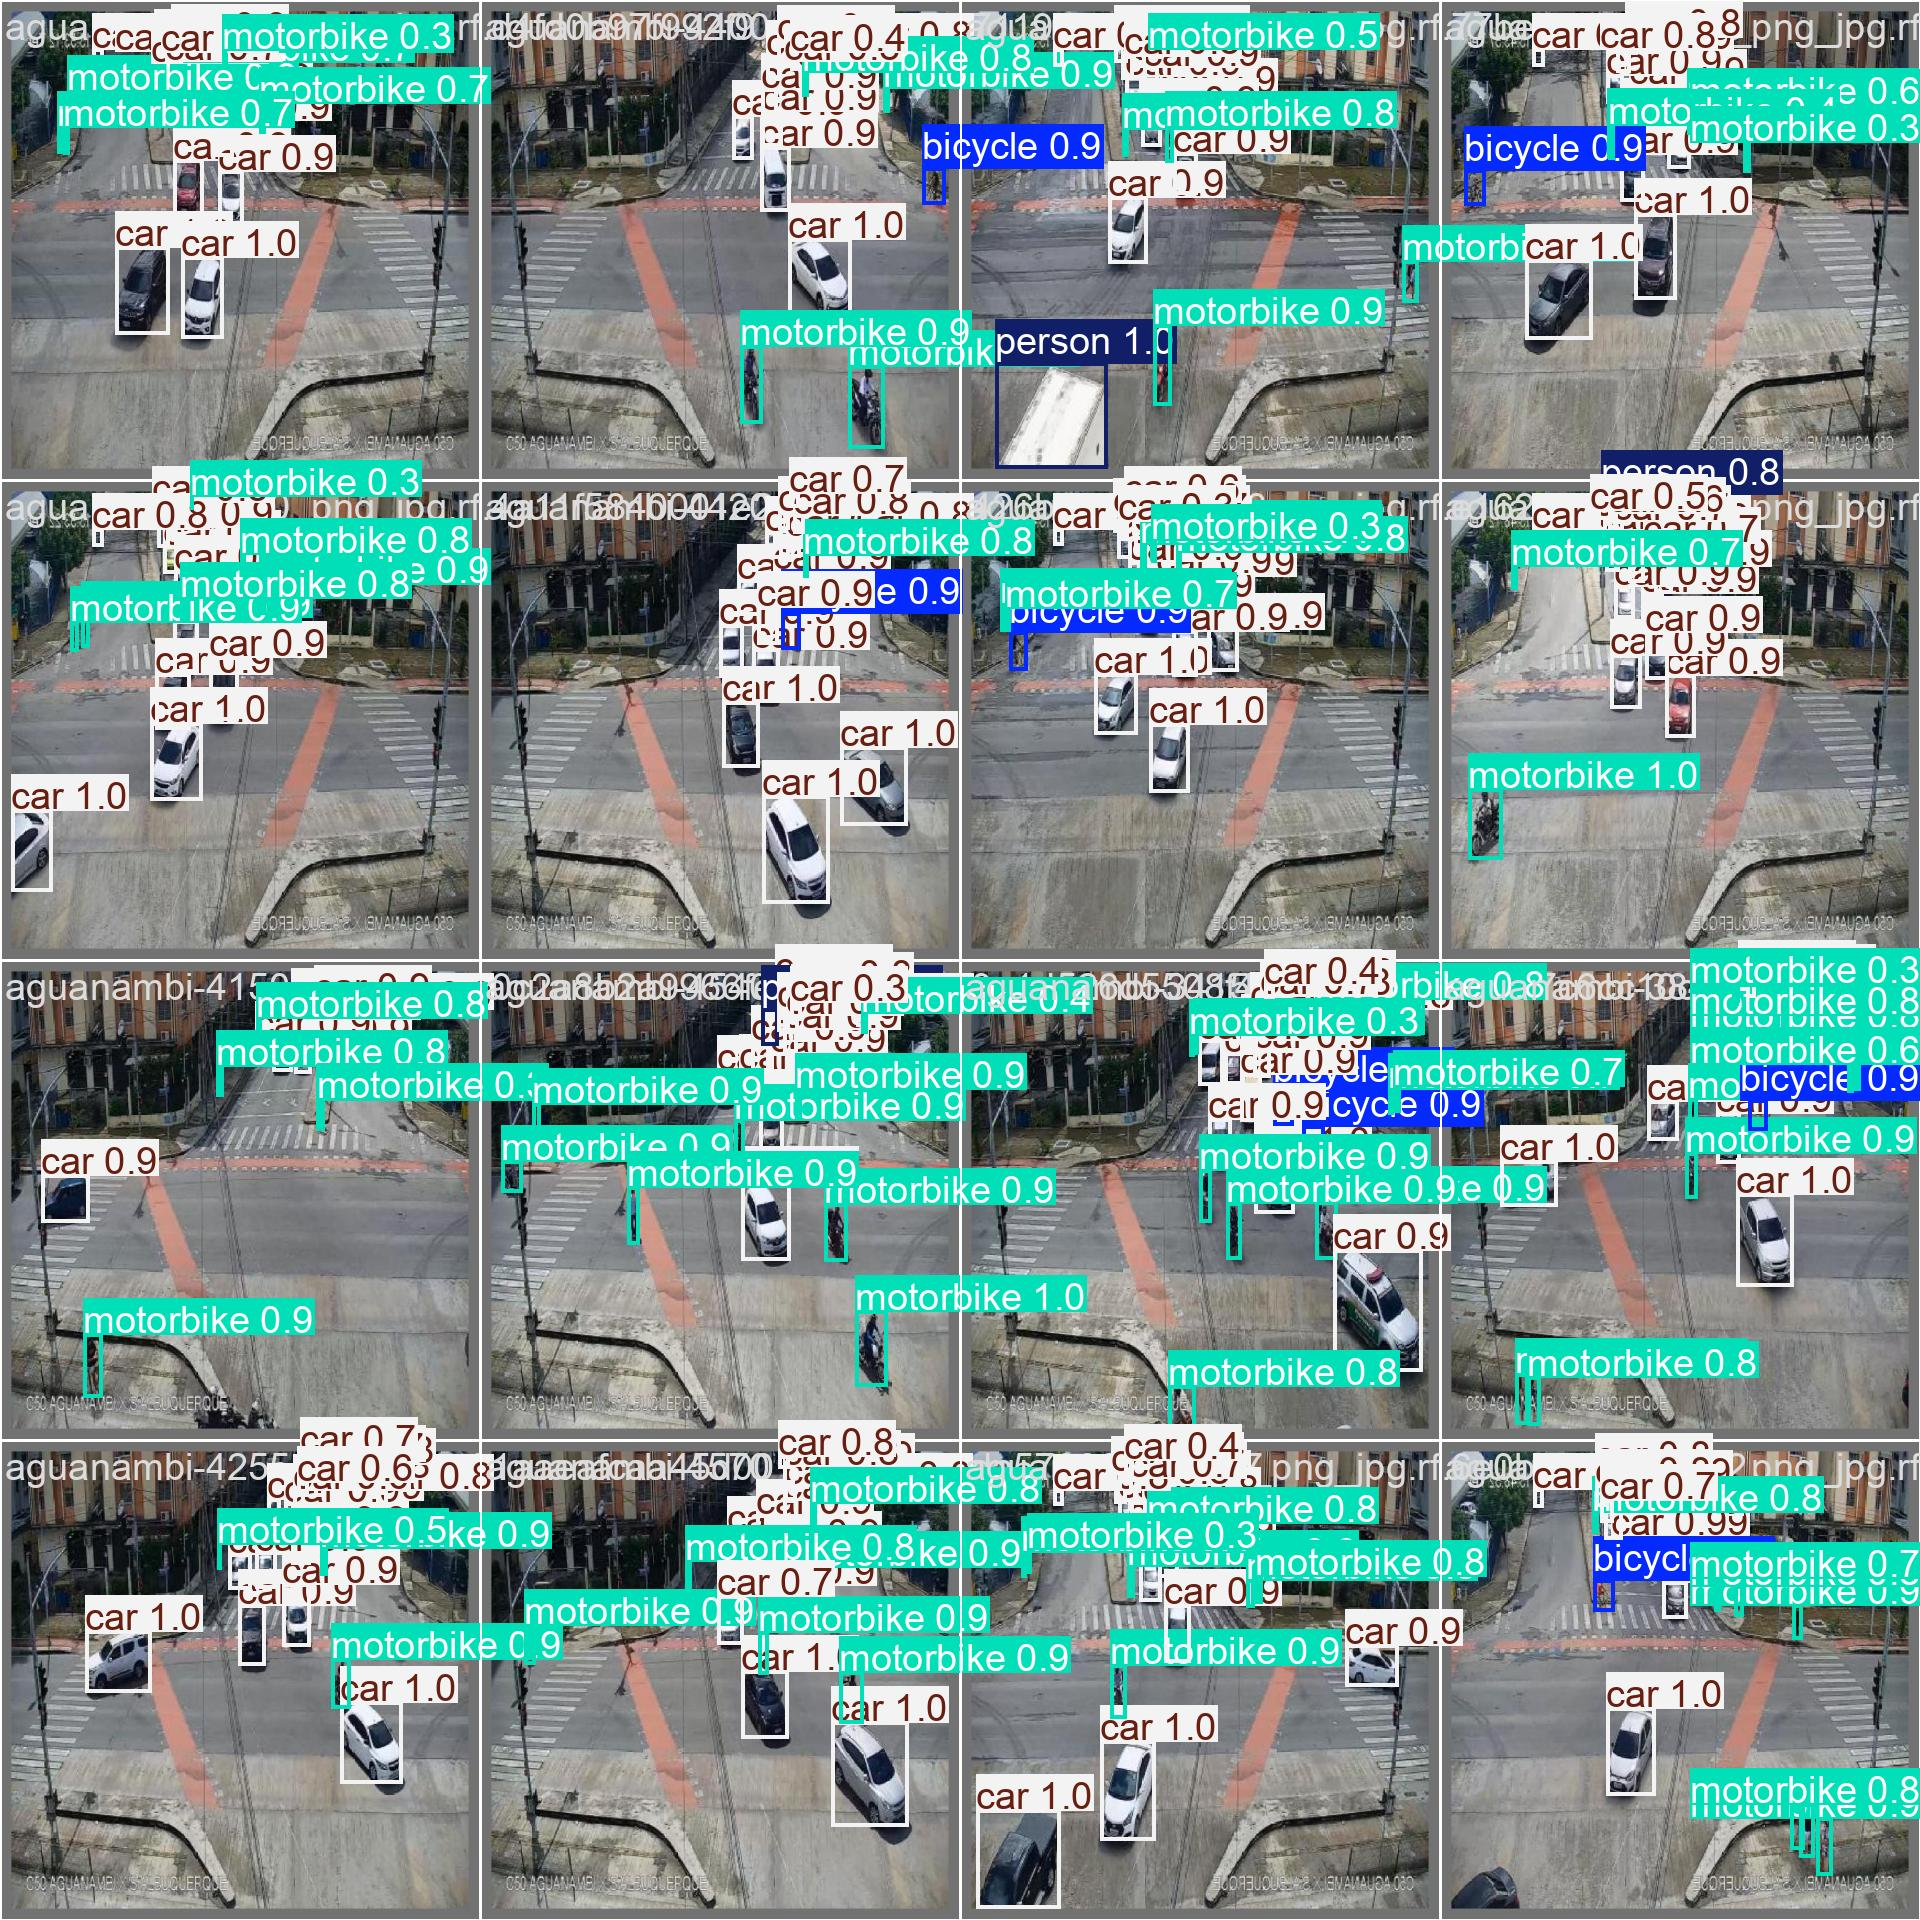

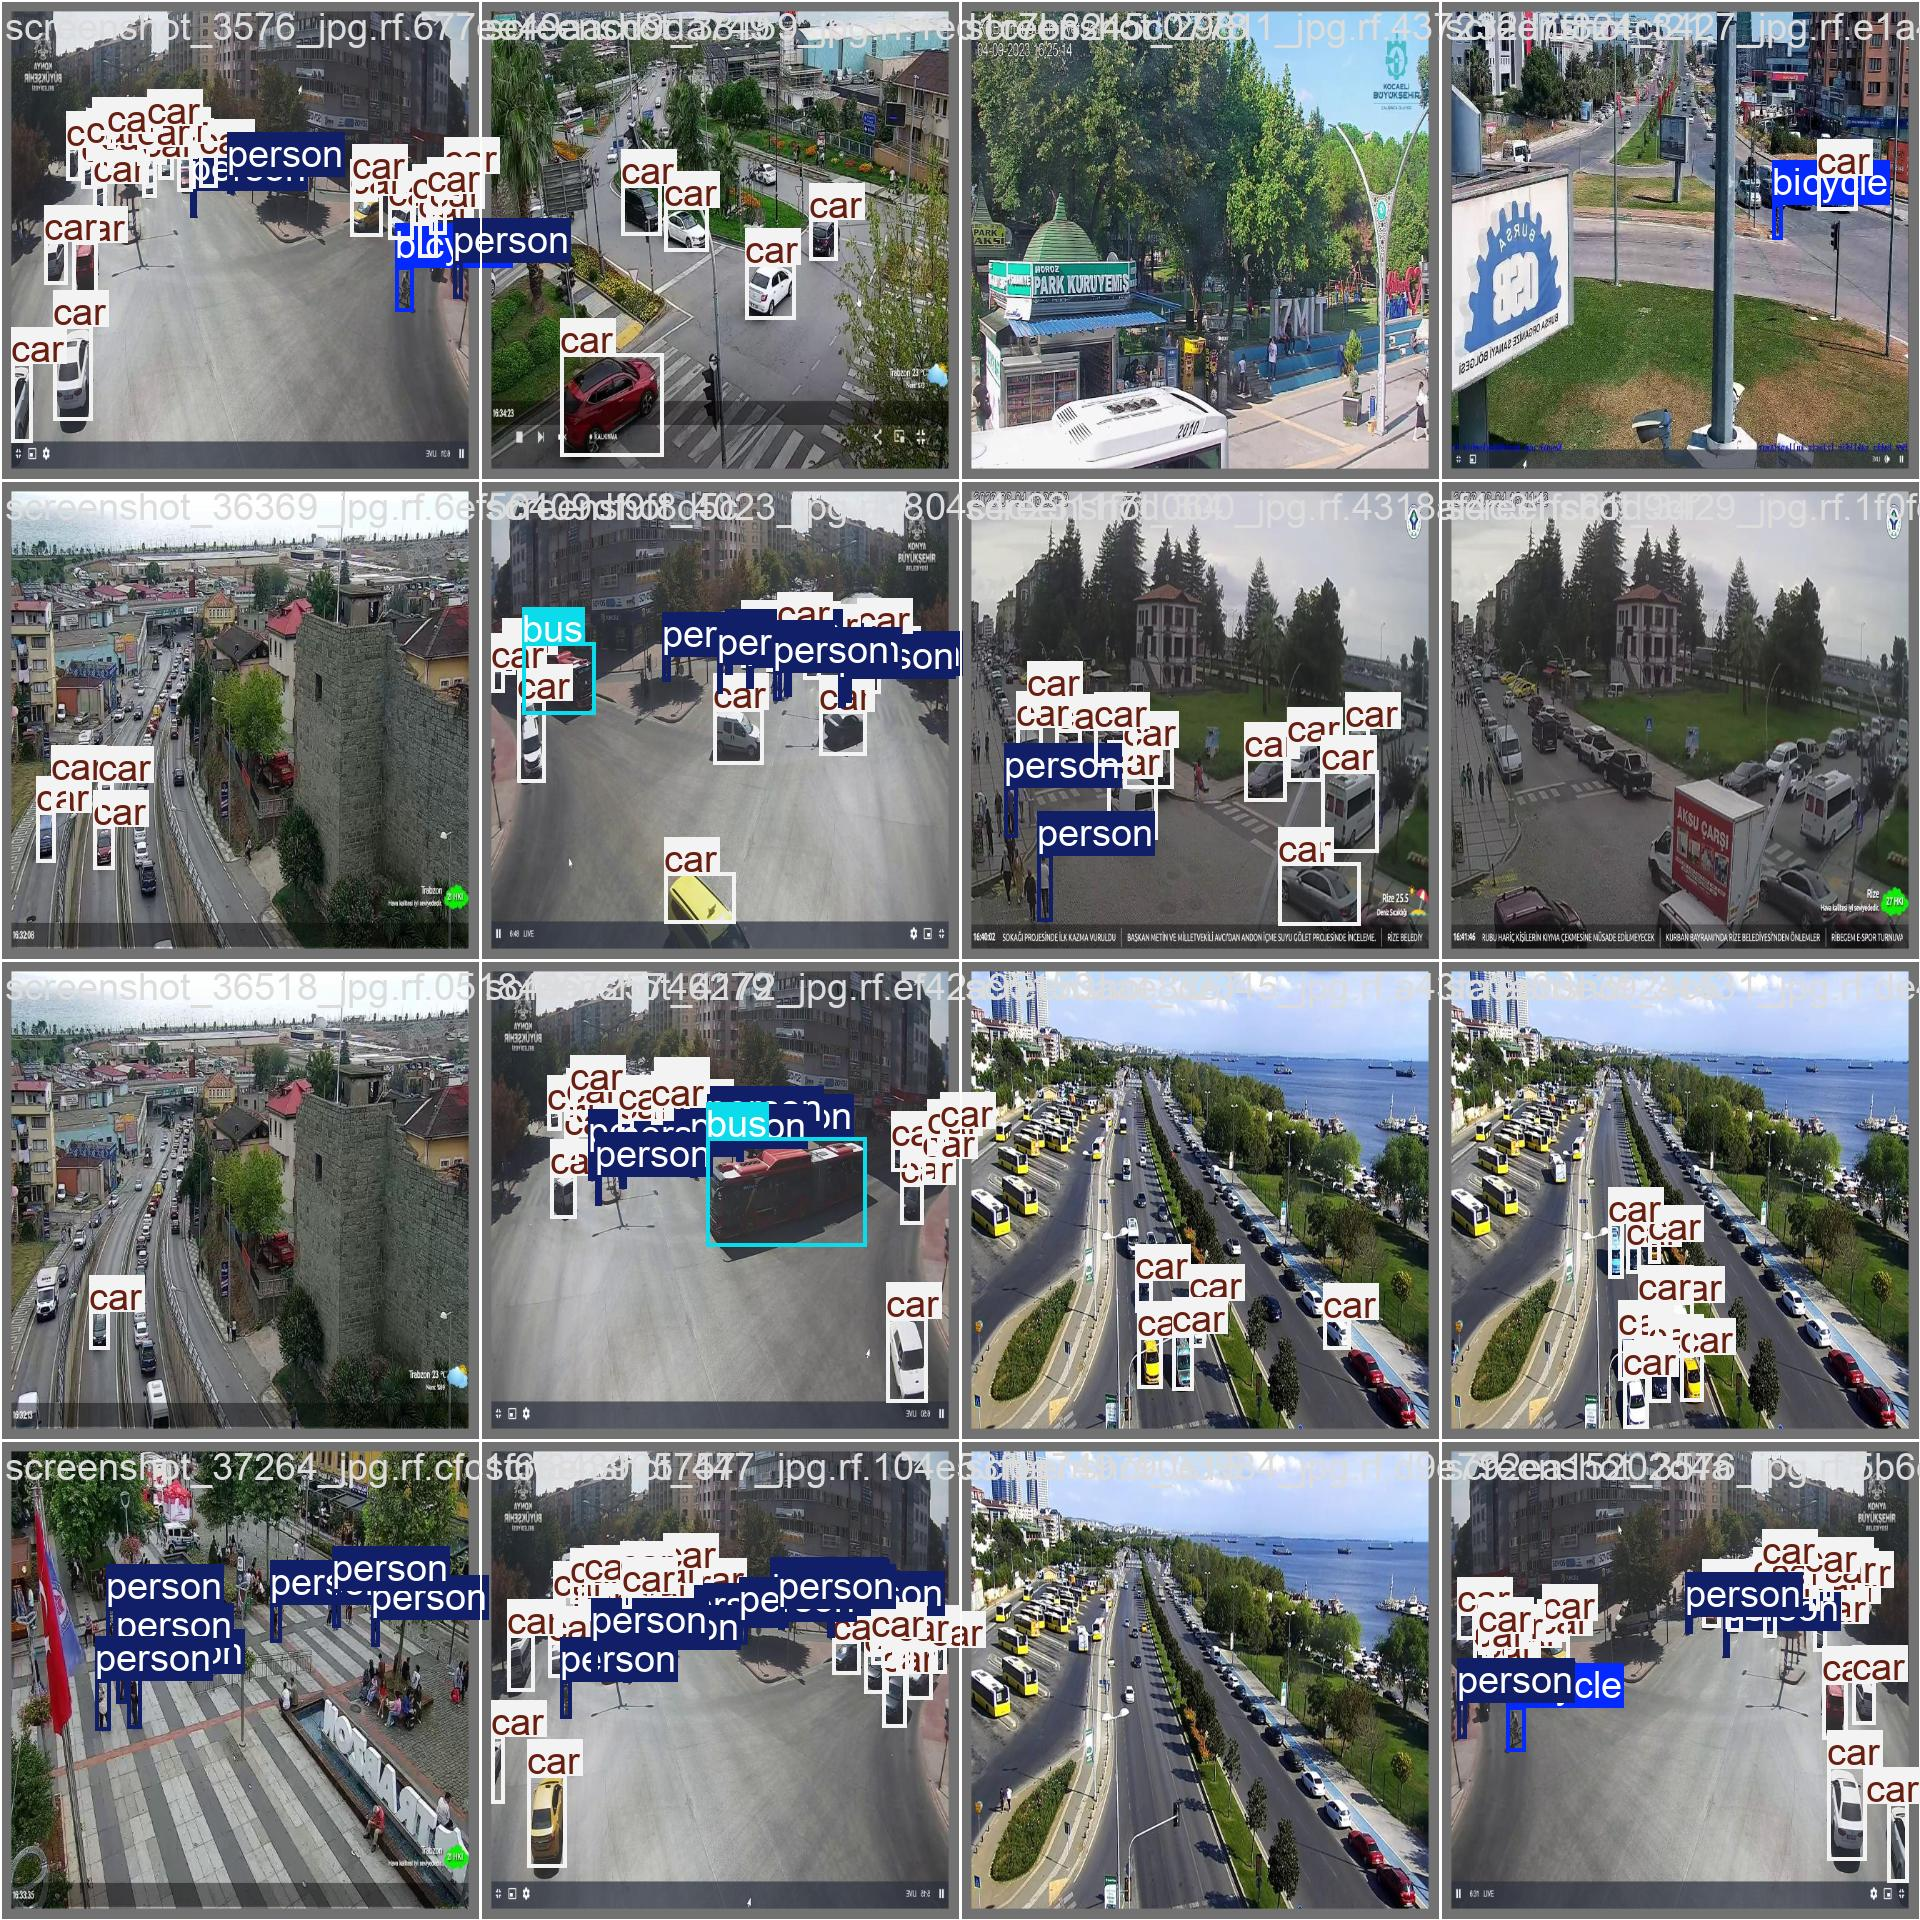

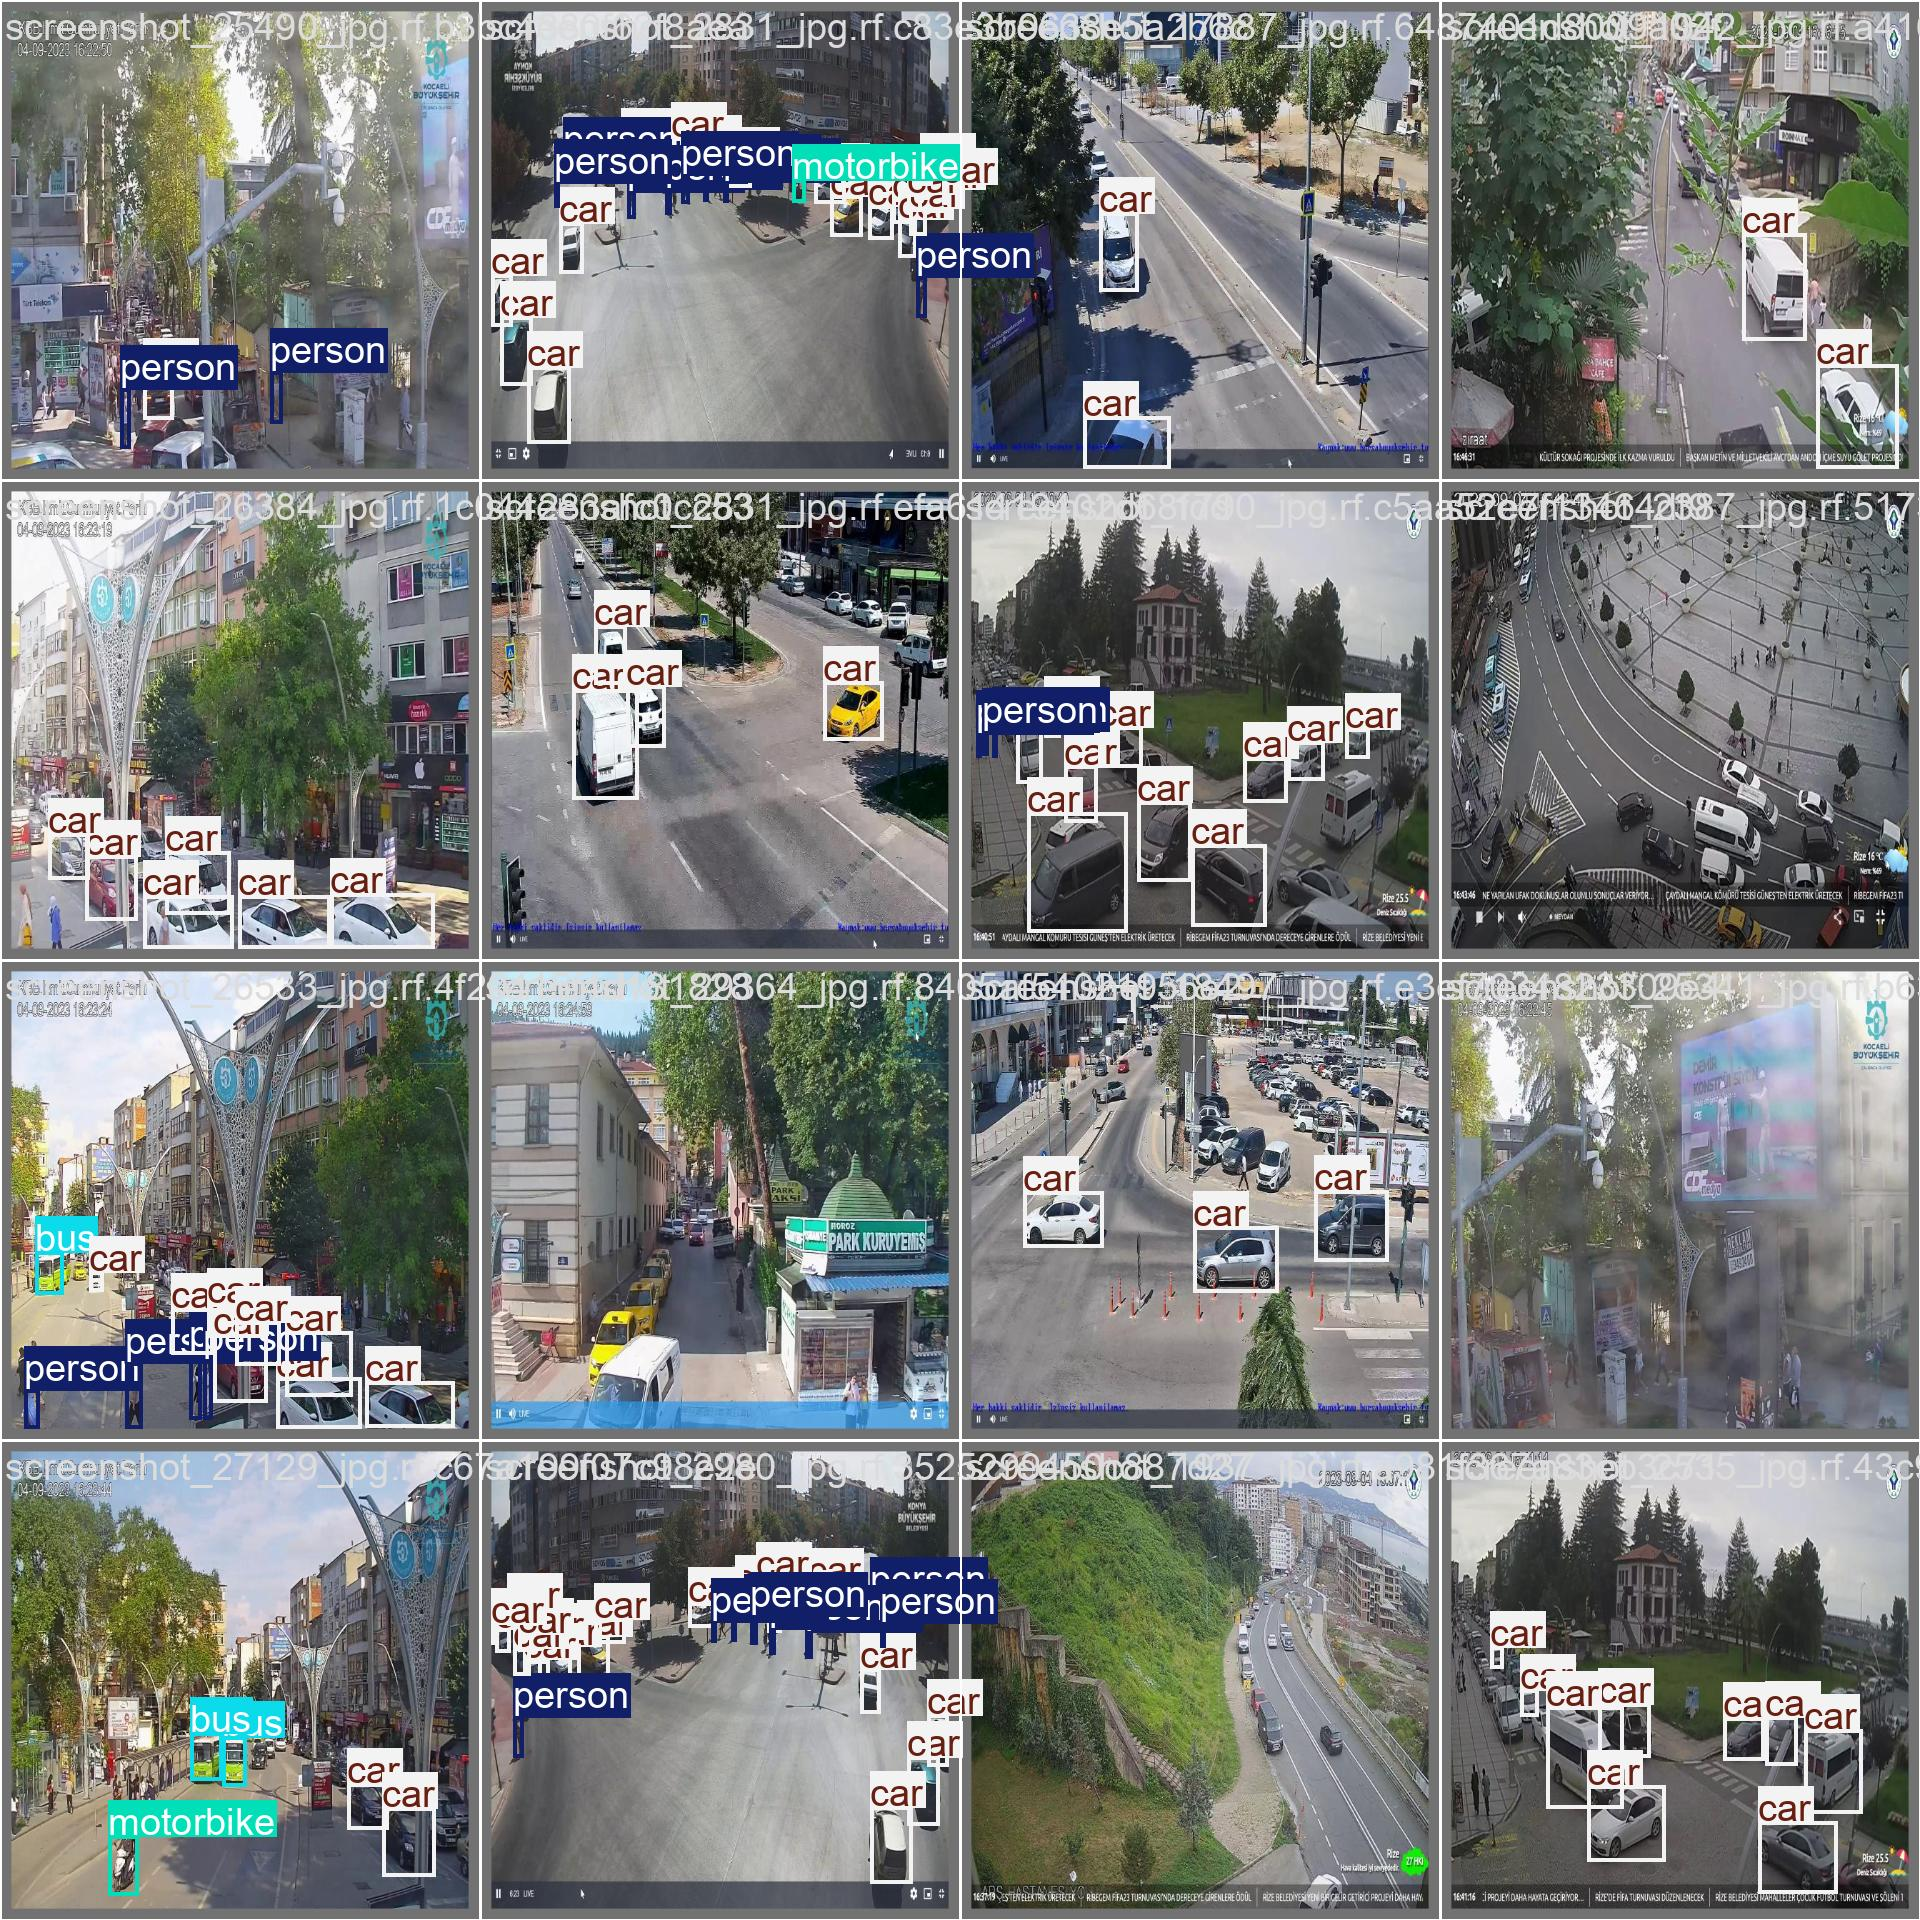

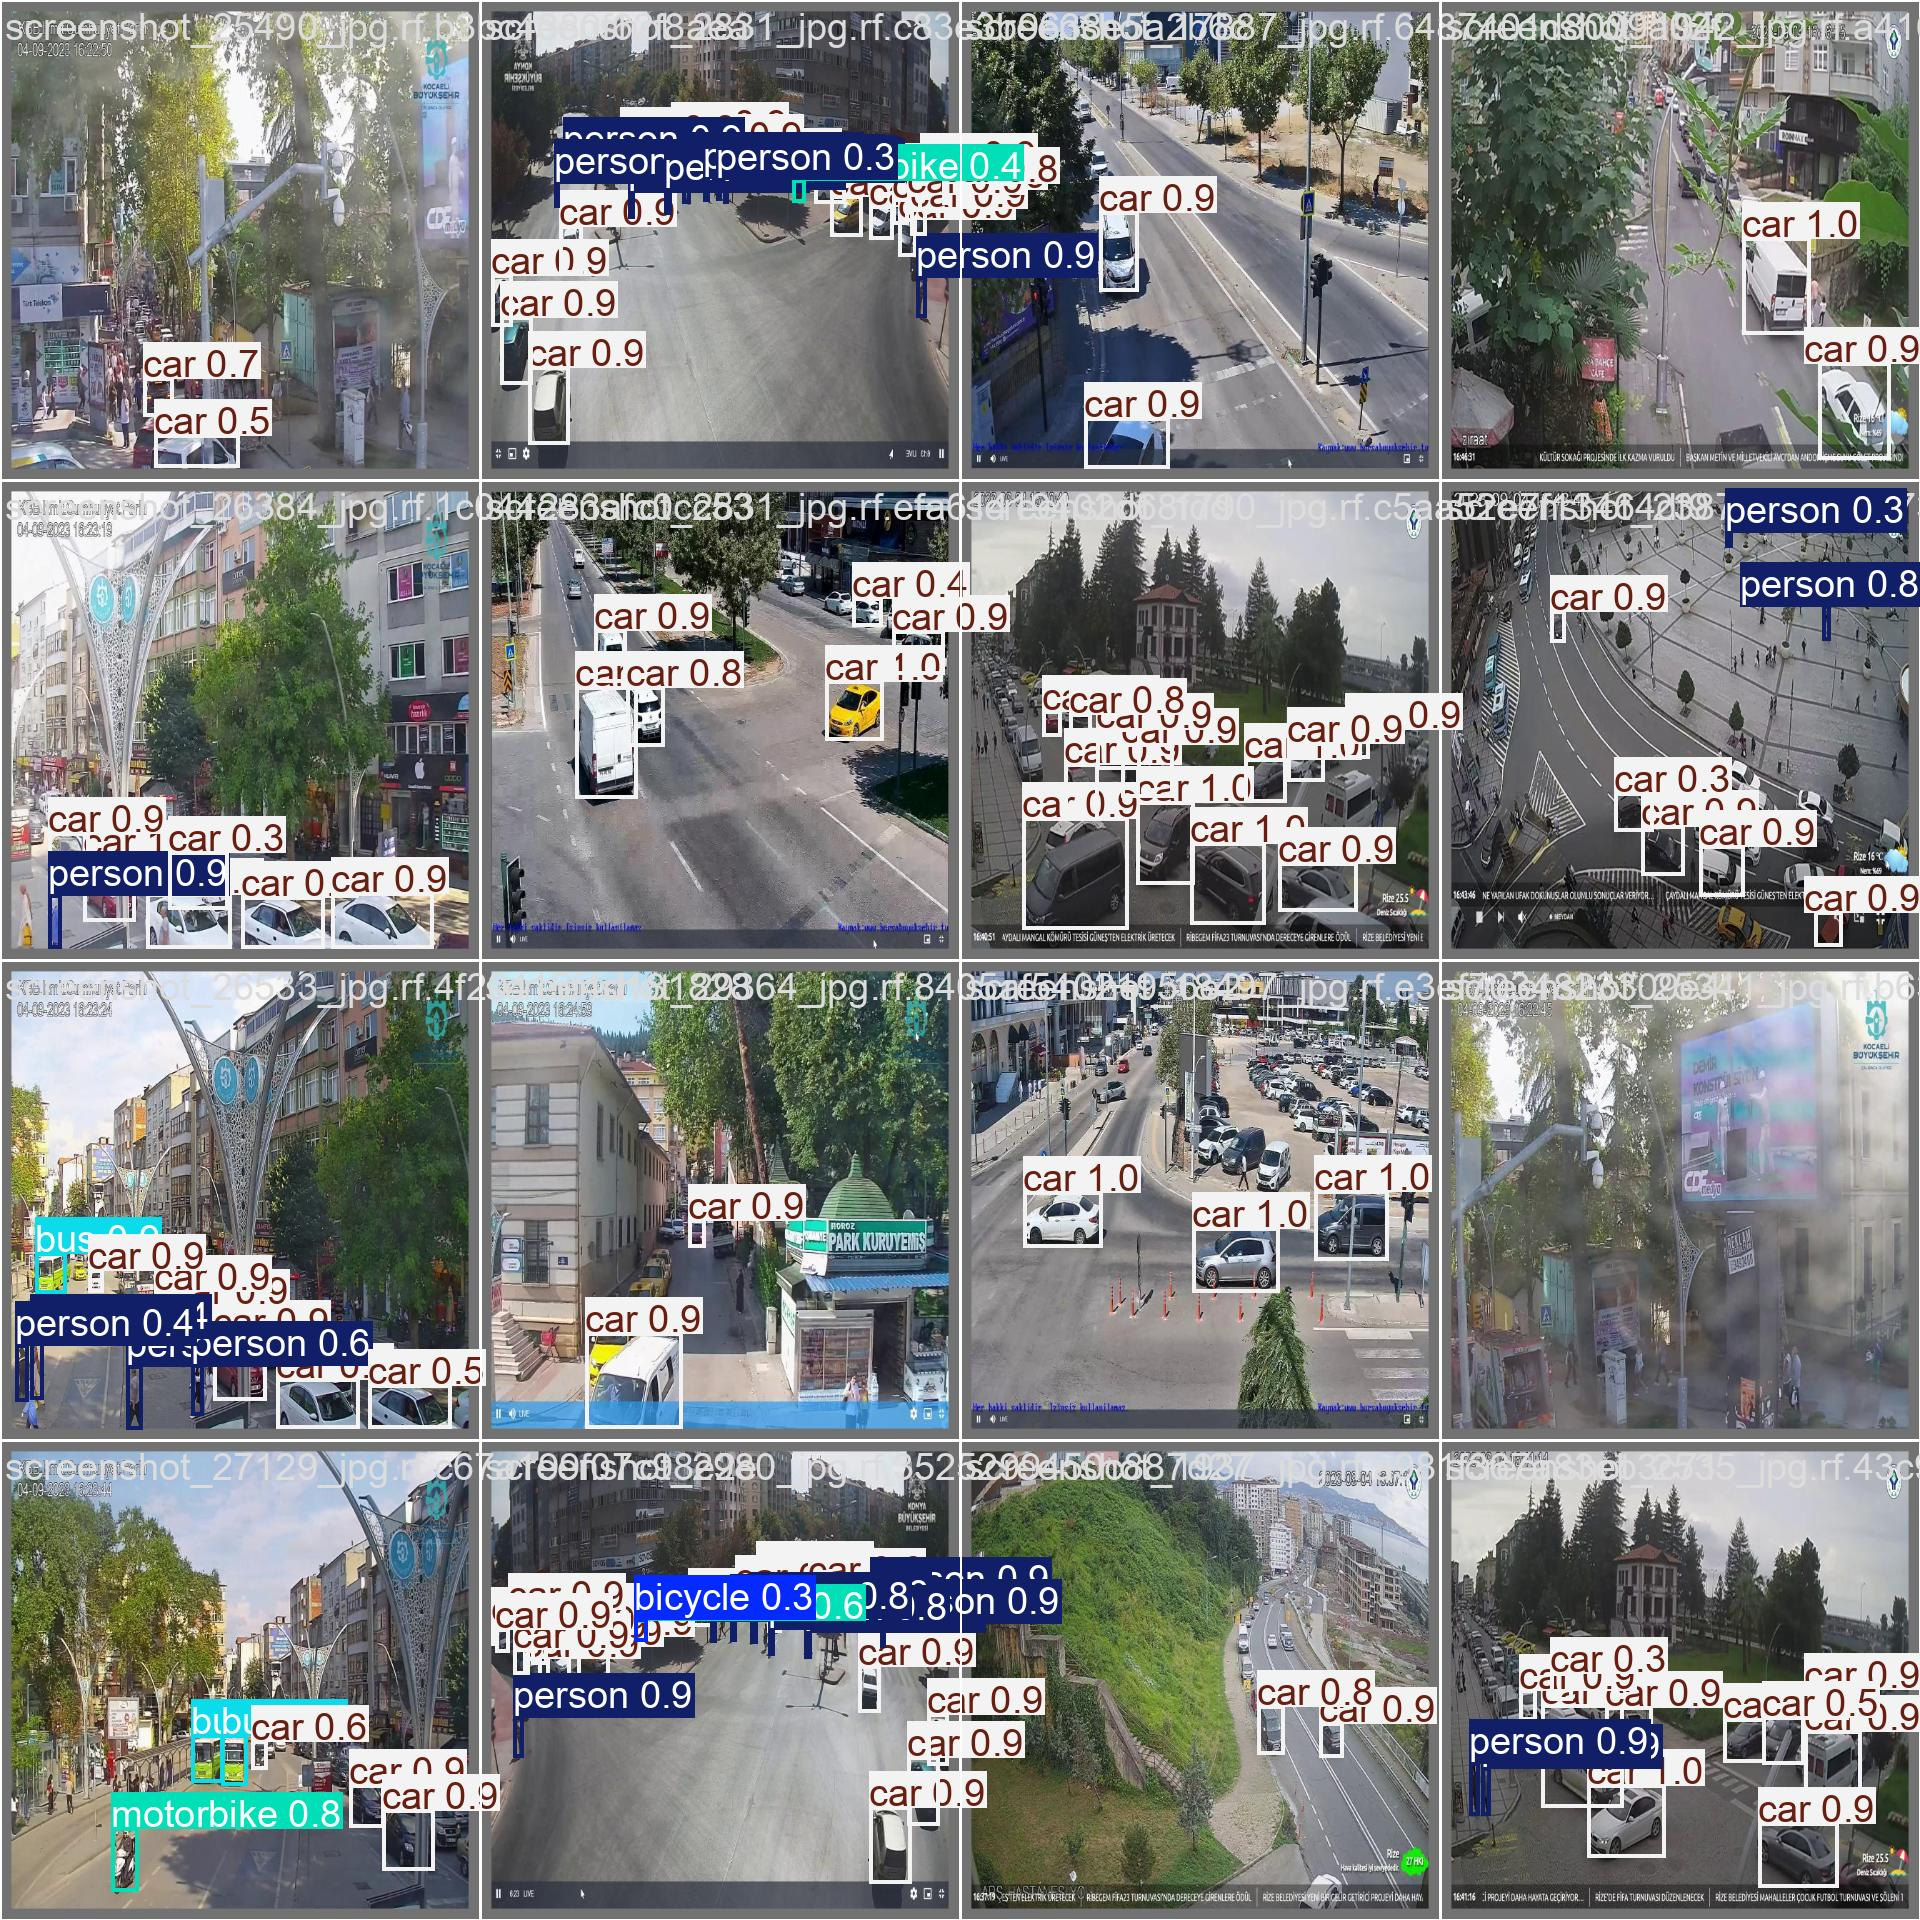

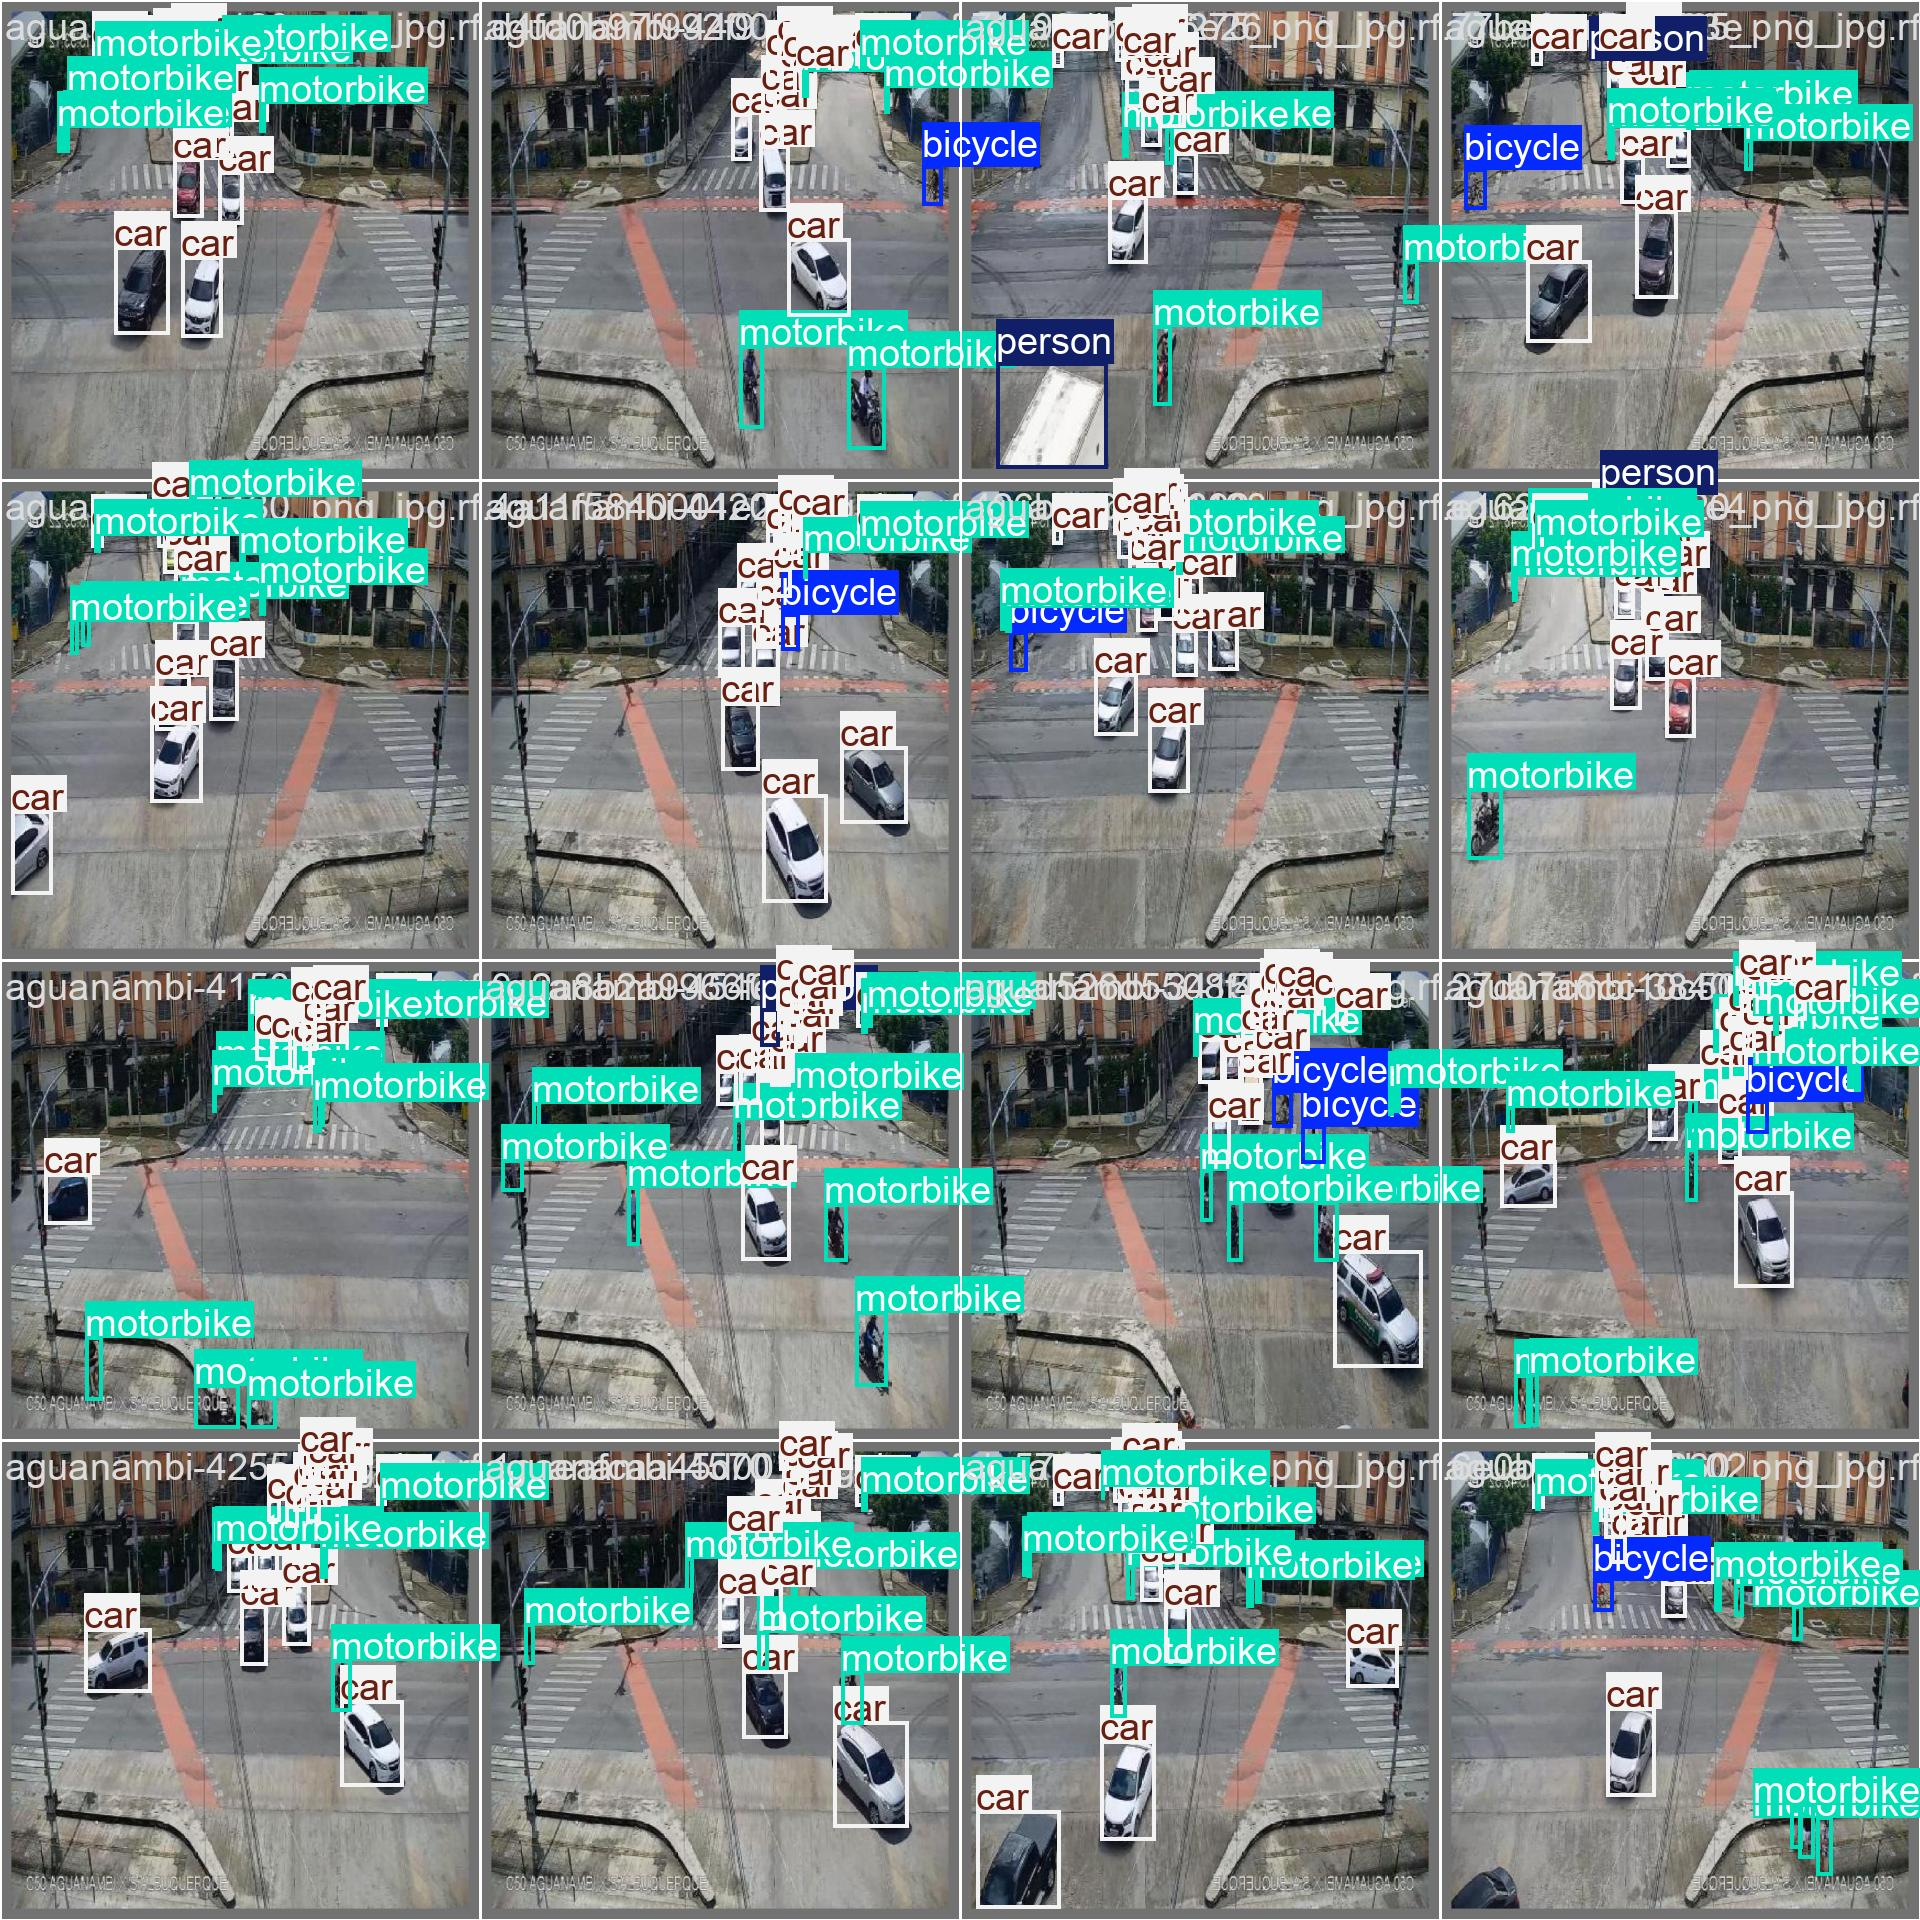

In [ ]:
import glob
from IPython.display import Image, display

for img_path in glob.glob('/content/runs/detect/val/*.png'):
    display(Image(filename=img_path))
for img_path in glob.glob('/content/runs/detect/val/*.jpg'):
    display(Image(filename=img_path))